Sebagai tugas akhir dari masa kontrakmu sebagai intern Data Scientist di ID/X Partners, kali ini kamu akan dilibatkan dalam projek dari sebuah lending company. Kamu akan berkolaborasi dengan berbagai departemen lain dalam projek ini untuk menyediakan solusi teknologi bagi company tersebut. Kamu diminta untuk membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

# Import Libraries and Load Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

C:\Users\putri\AppData\Local\Temp\ipykernel_20492\1845647960.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Explanatory Data Analysis

## Descriptive Analysis

In [3]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [5]:
numerical = df.select_dtypes(include='number').columns
numerical = [col for col in numerical if not pd.isna(df[col].mean())]

In [6]:
categorical = df.select_dtypes(include='object').columns.tolist()

In [7]:
df[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [8]:
# check null
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [9]:
# check duplicate
df.duplicated().sum()

0

### Insight Summary

- Dataset was consisted of 75 columns with 53 numerics, and 22 objects
- Some columns were not informative due to high number of Null
- There was no duplicated row in the dataset

## Data Visualization

In [10]:
# Order the subgrade and grade from A1 to G5
subgrade_order = [
    "A1", "A2", "A3", "A4", "A5",
    "B1", "B2", "B3", "B4", "B5",
    "C1", "C2", "C3", "C4", "C5",
    "D1", "D2", "D3", "D4", "D5",
    "E1", "E2", "E3", "E4", "E5",
    "F1", "F2", "F3", "F4", "F5",
    "G1", "G2", "G3", "G4", "G5"
]

grade_order = ['A','B','C','D','E']

# Convert Subgrade and Grade into categorical columns
df['sub_grade'] = pd.Categorical(df['sub_grade'], categories=subgrade_order, ordered=True)
df['grade'] = pd.Categorical(df['grade'], categories = grade_order, ordered=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'Default'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'In Grace Period'),
  Text(6, 0, 'Late (16-30 days)'),
  Text(7, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(8, 0, 'Does not meet the credit policy. Status:Charged Off')])

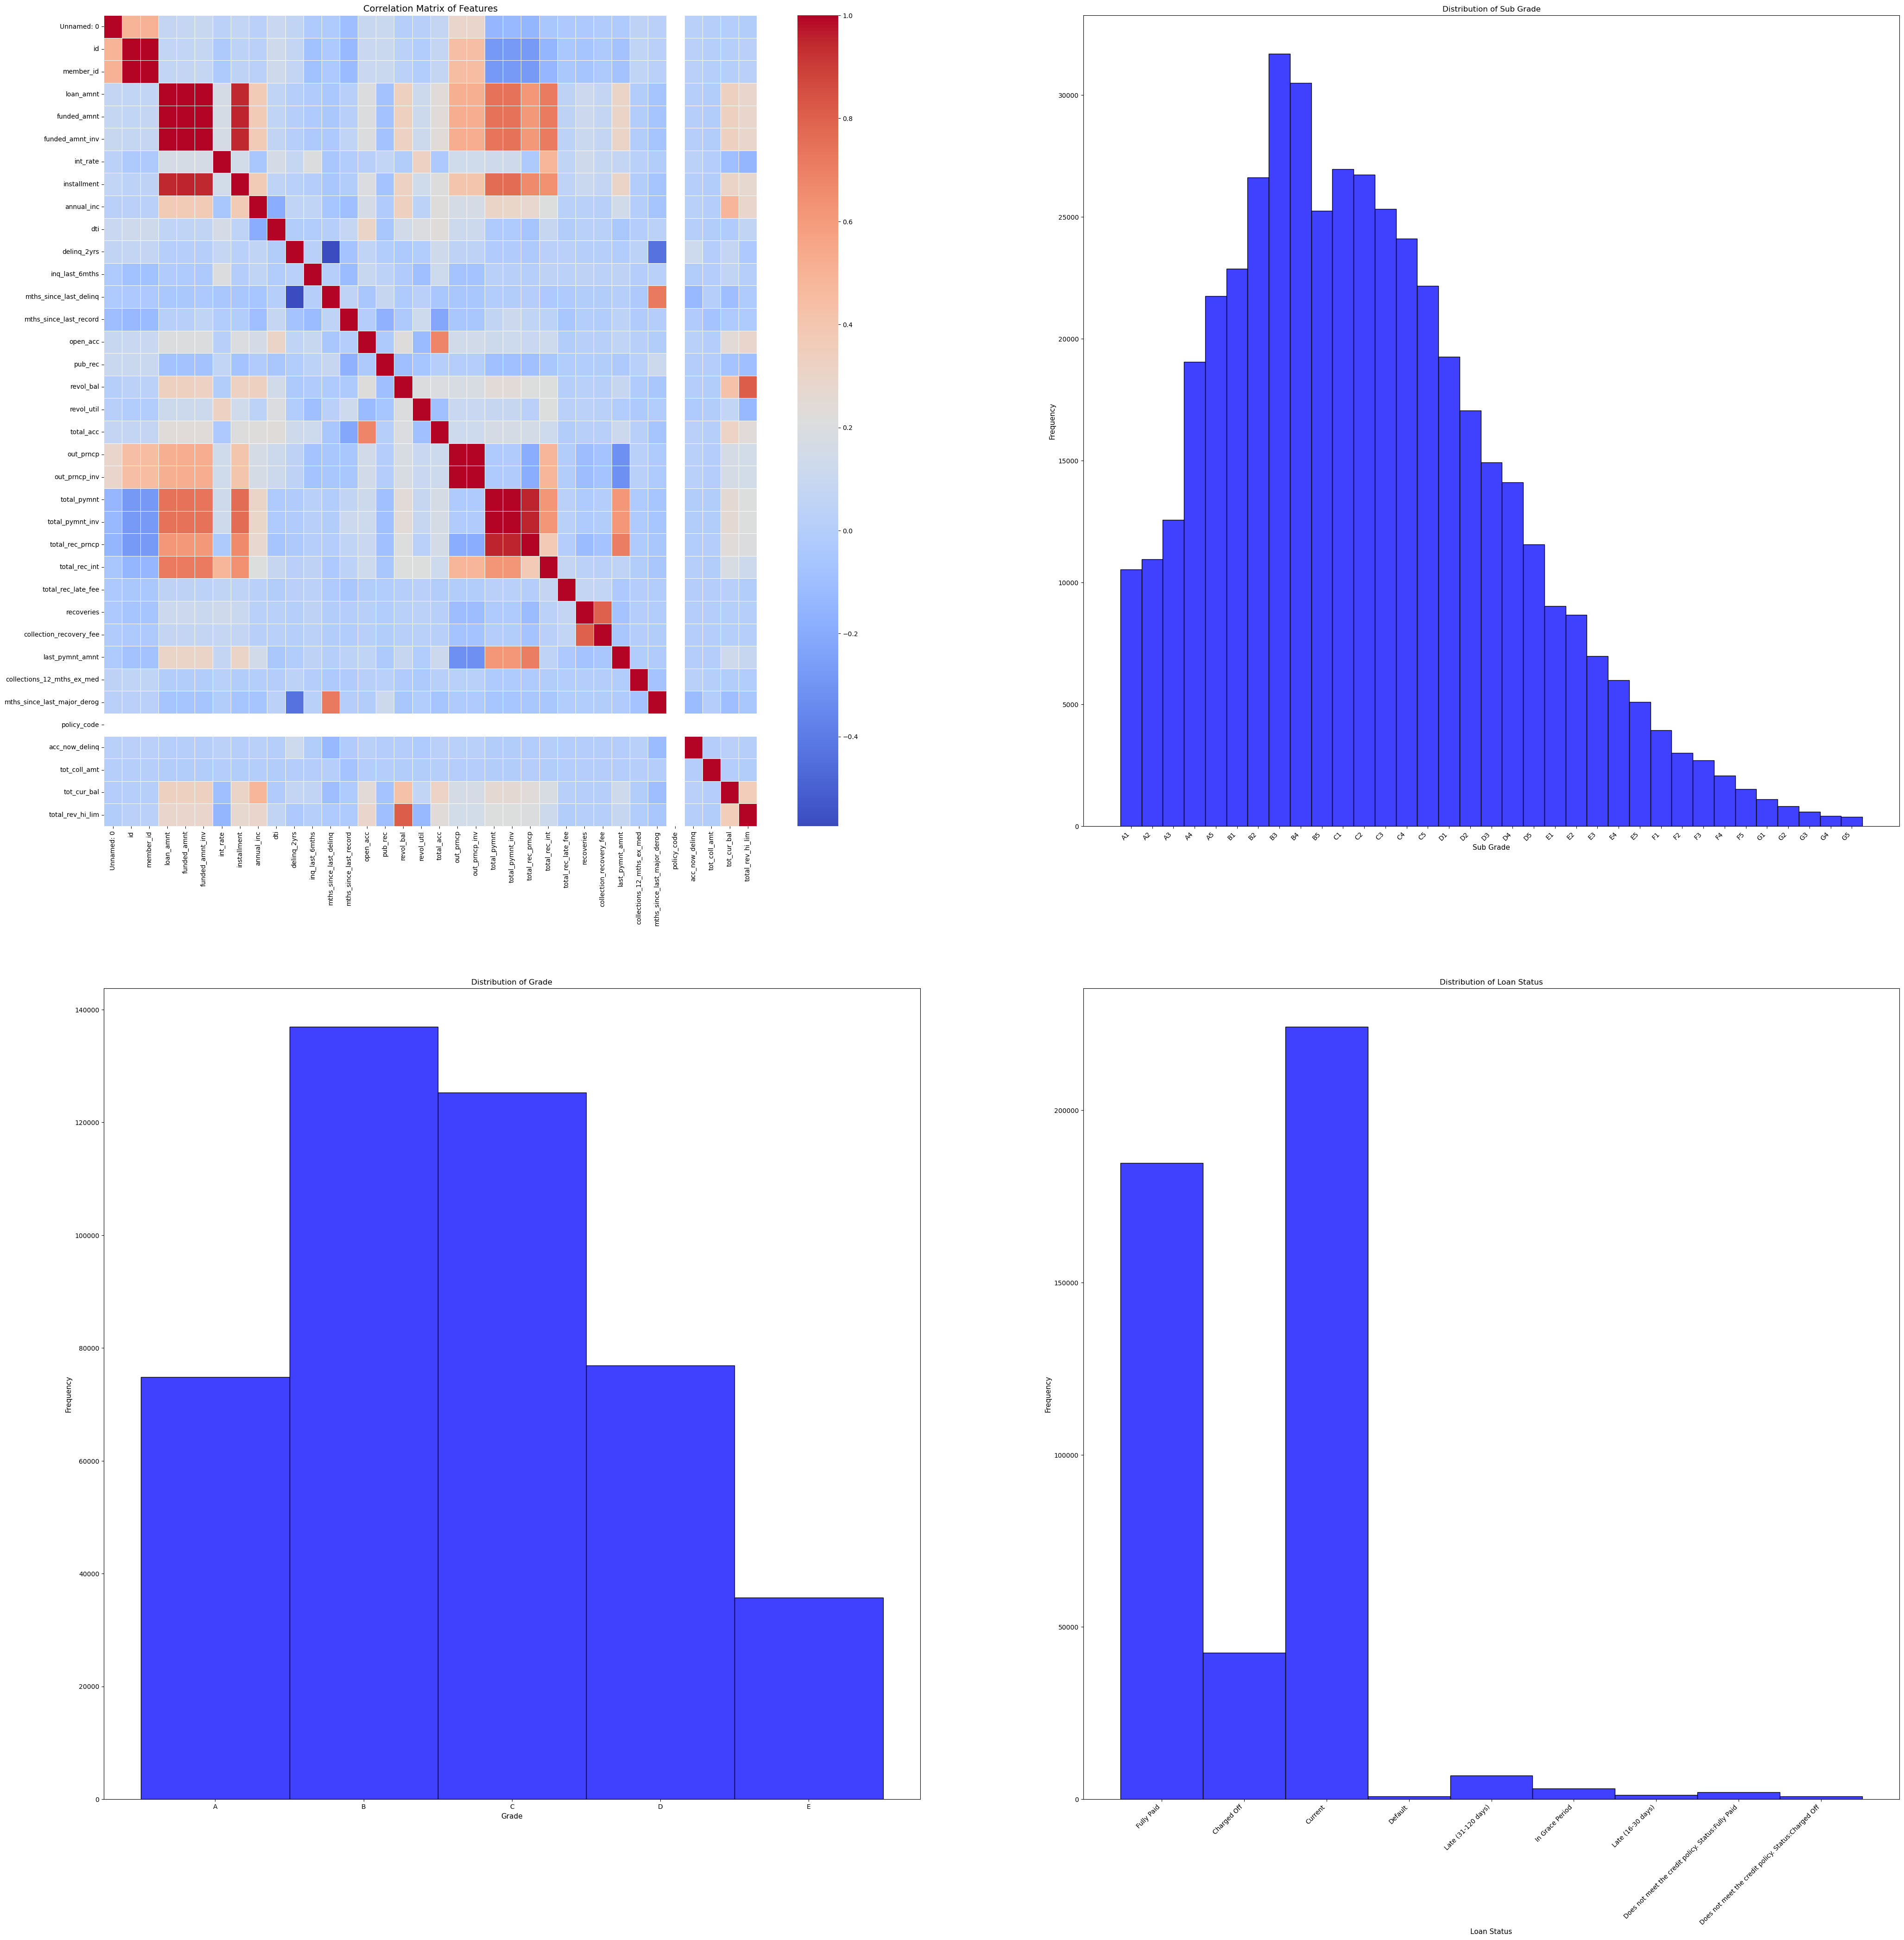

In [11]:
plt.figure(figsize=(50,50))

# correlation heatmap
plt.subplot(2,2,1)
sns.heatmap(df[numerical].corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features',fontsize=14)

# distribution of sub grade
plt.subplot(2,2,2)
sns.histplot(df, x='sub_grade', kde=False, discrete=True, color='blue')
plt.title('Distribution of Sub Grade')
plt.xlabel('Sub Grade', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.xticks(rotation=45, ha='right')

# distribution of grade
plt.subplot(2,2,3)
sns.histplot(df, x='grade', kde=False, discrete=True, color='blue')
plt.title('Distribution of Grade')
plt.xlabel('Grade', fontsize=11)
plt.ylabel('Frequency', fontsize=11)

# distribution of loan_status
plt.subplot(2,2,4)
sns.histplot(df, x='loan_status', kde=False, discrete=True, color='blue')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.xticks(rotation=45, ha='right')



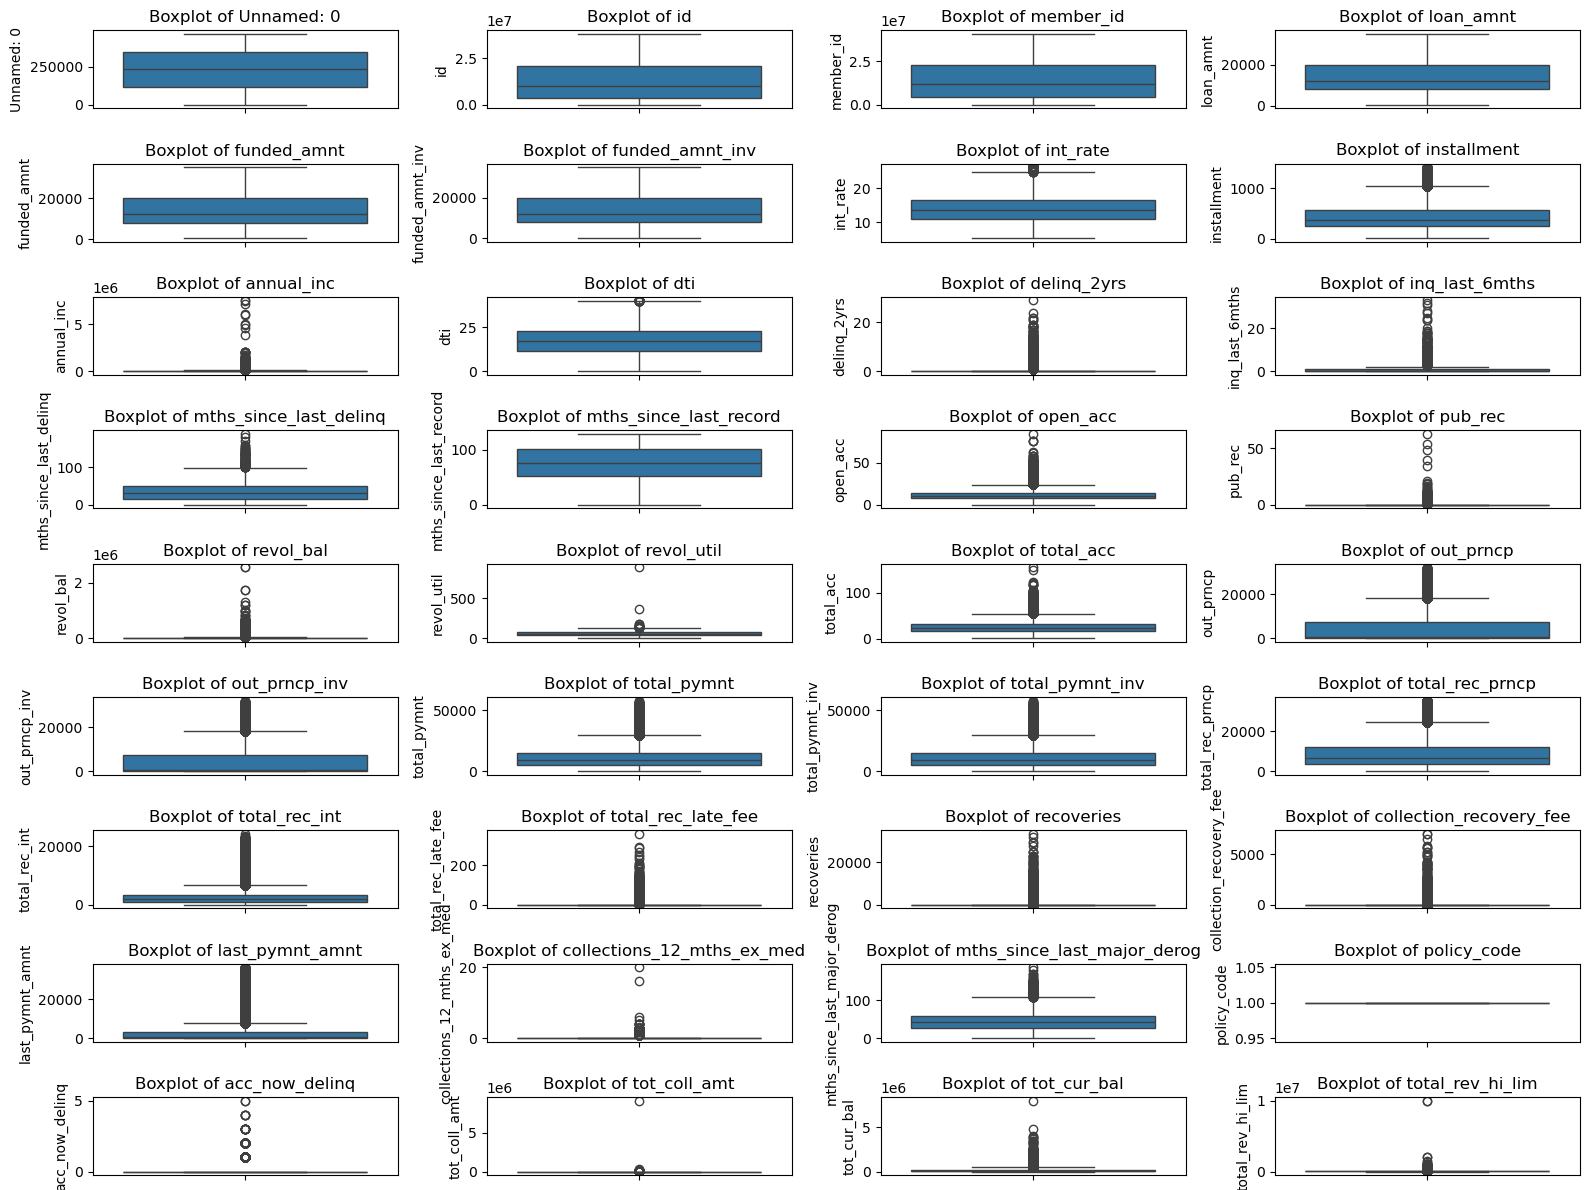

In [12]:
# check the outliers on numerical columns

plt.figure(figsize=(16,12))
for i, num in enumerate(numerical,1):
    plt.subplot(9,4,i)
    sns.boxplot(df[num])
    plt.title(f'Boxplot of {num}')
plt.tight_layout()
plt.show()

    


C:\Users\putri\AppData\Local\Temp\ipykernel_20492\2780984150.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[num])


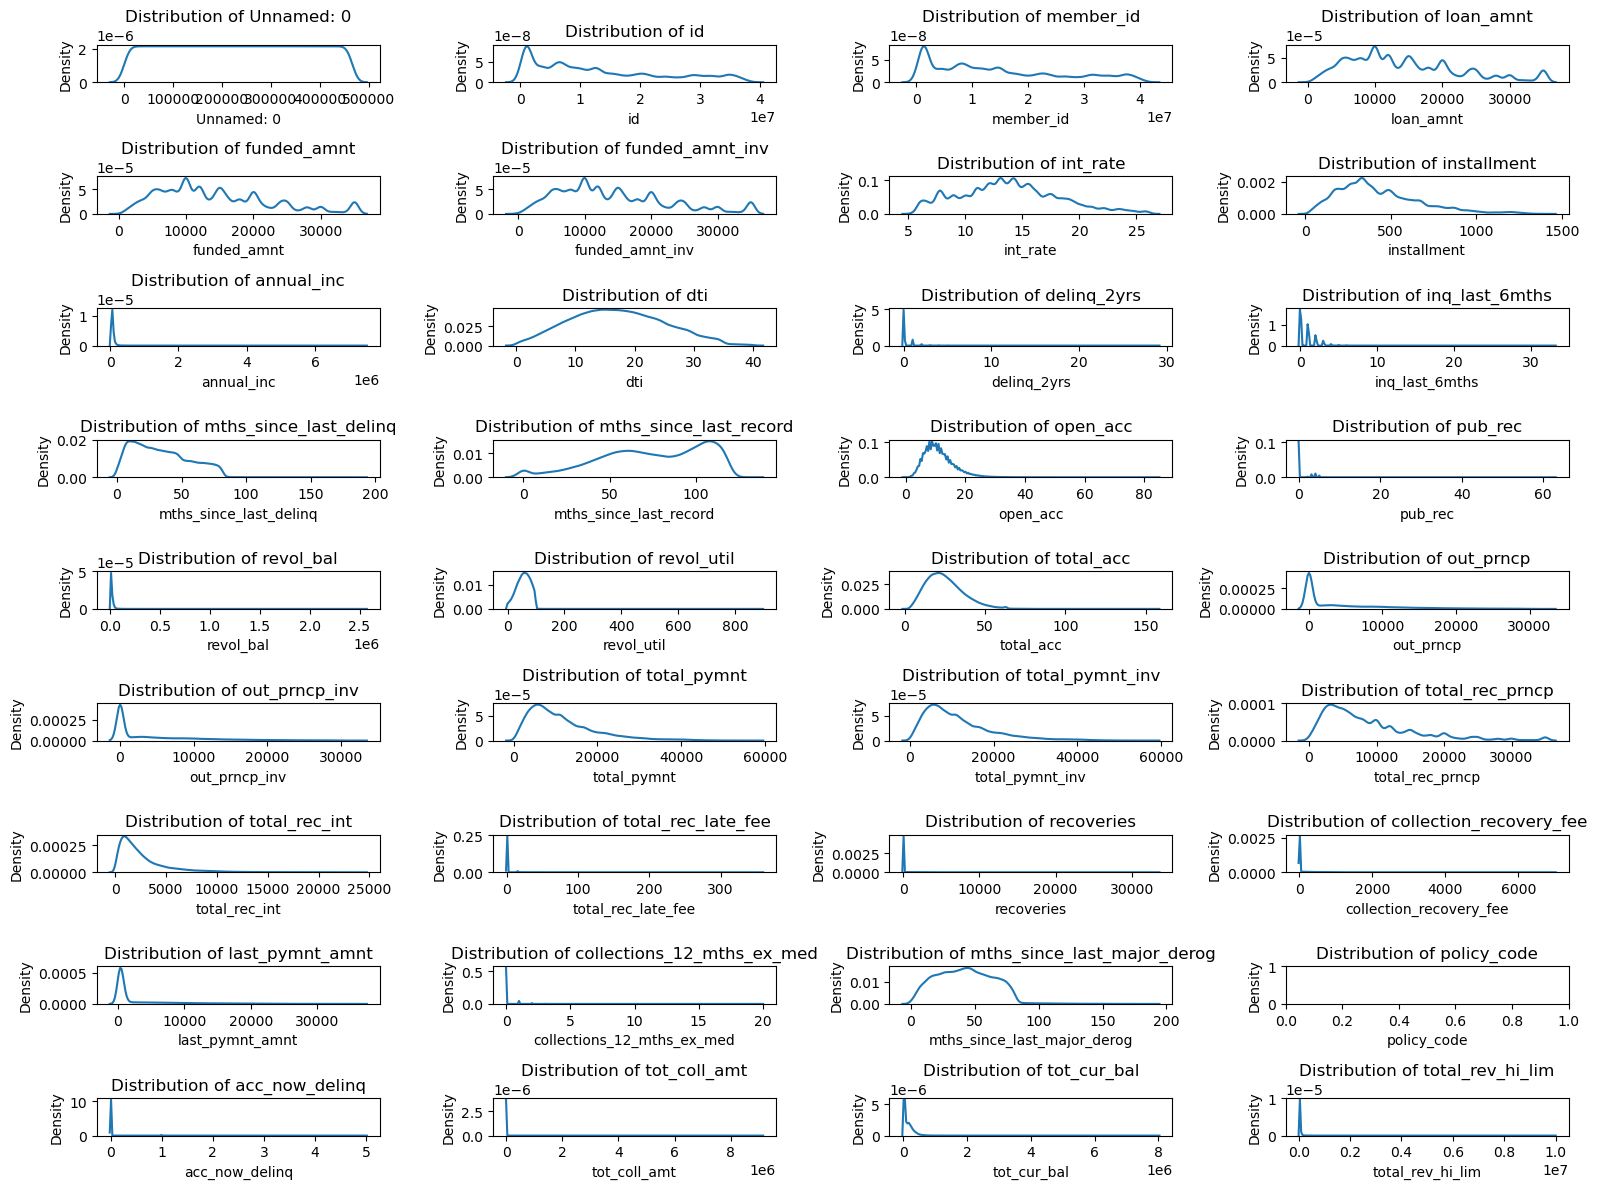

In [13]:
# check the distribution of numerical columns

plt.figure(figsize=(16,12))
for i, num in enumerate(numerical,1):
    plt.subplot(9,4,i)
    sns.kdeplot(df[num])
    plt.title(f'Distribution of {num}')
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'Default'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'In Grace Period'),
  Text(6, 0, 'Late (16-30 days)'),
  Text(7, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(8, 0, 'Does not meet the credit policy. Status:Charged Off')])

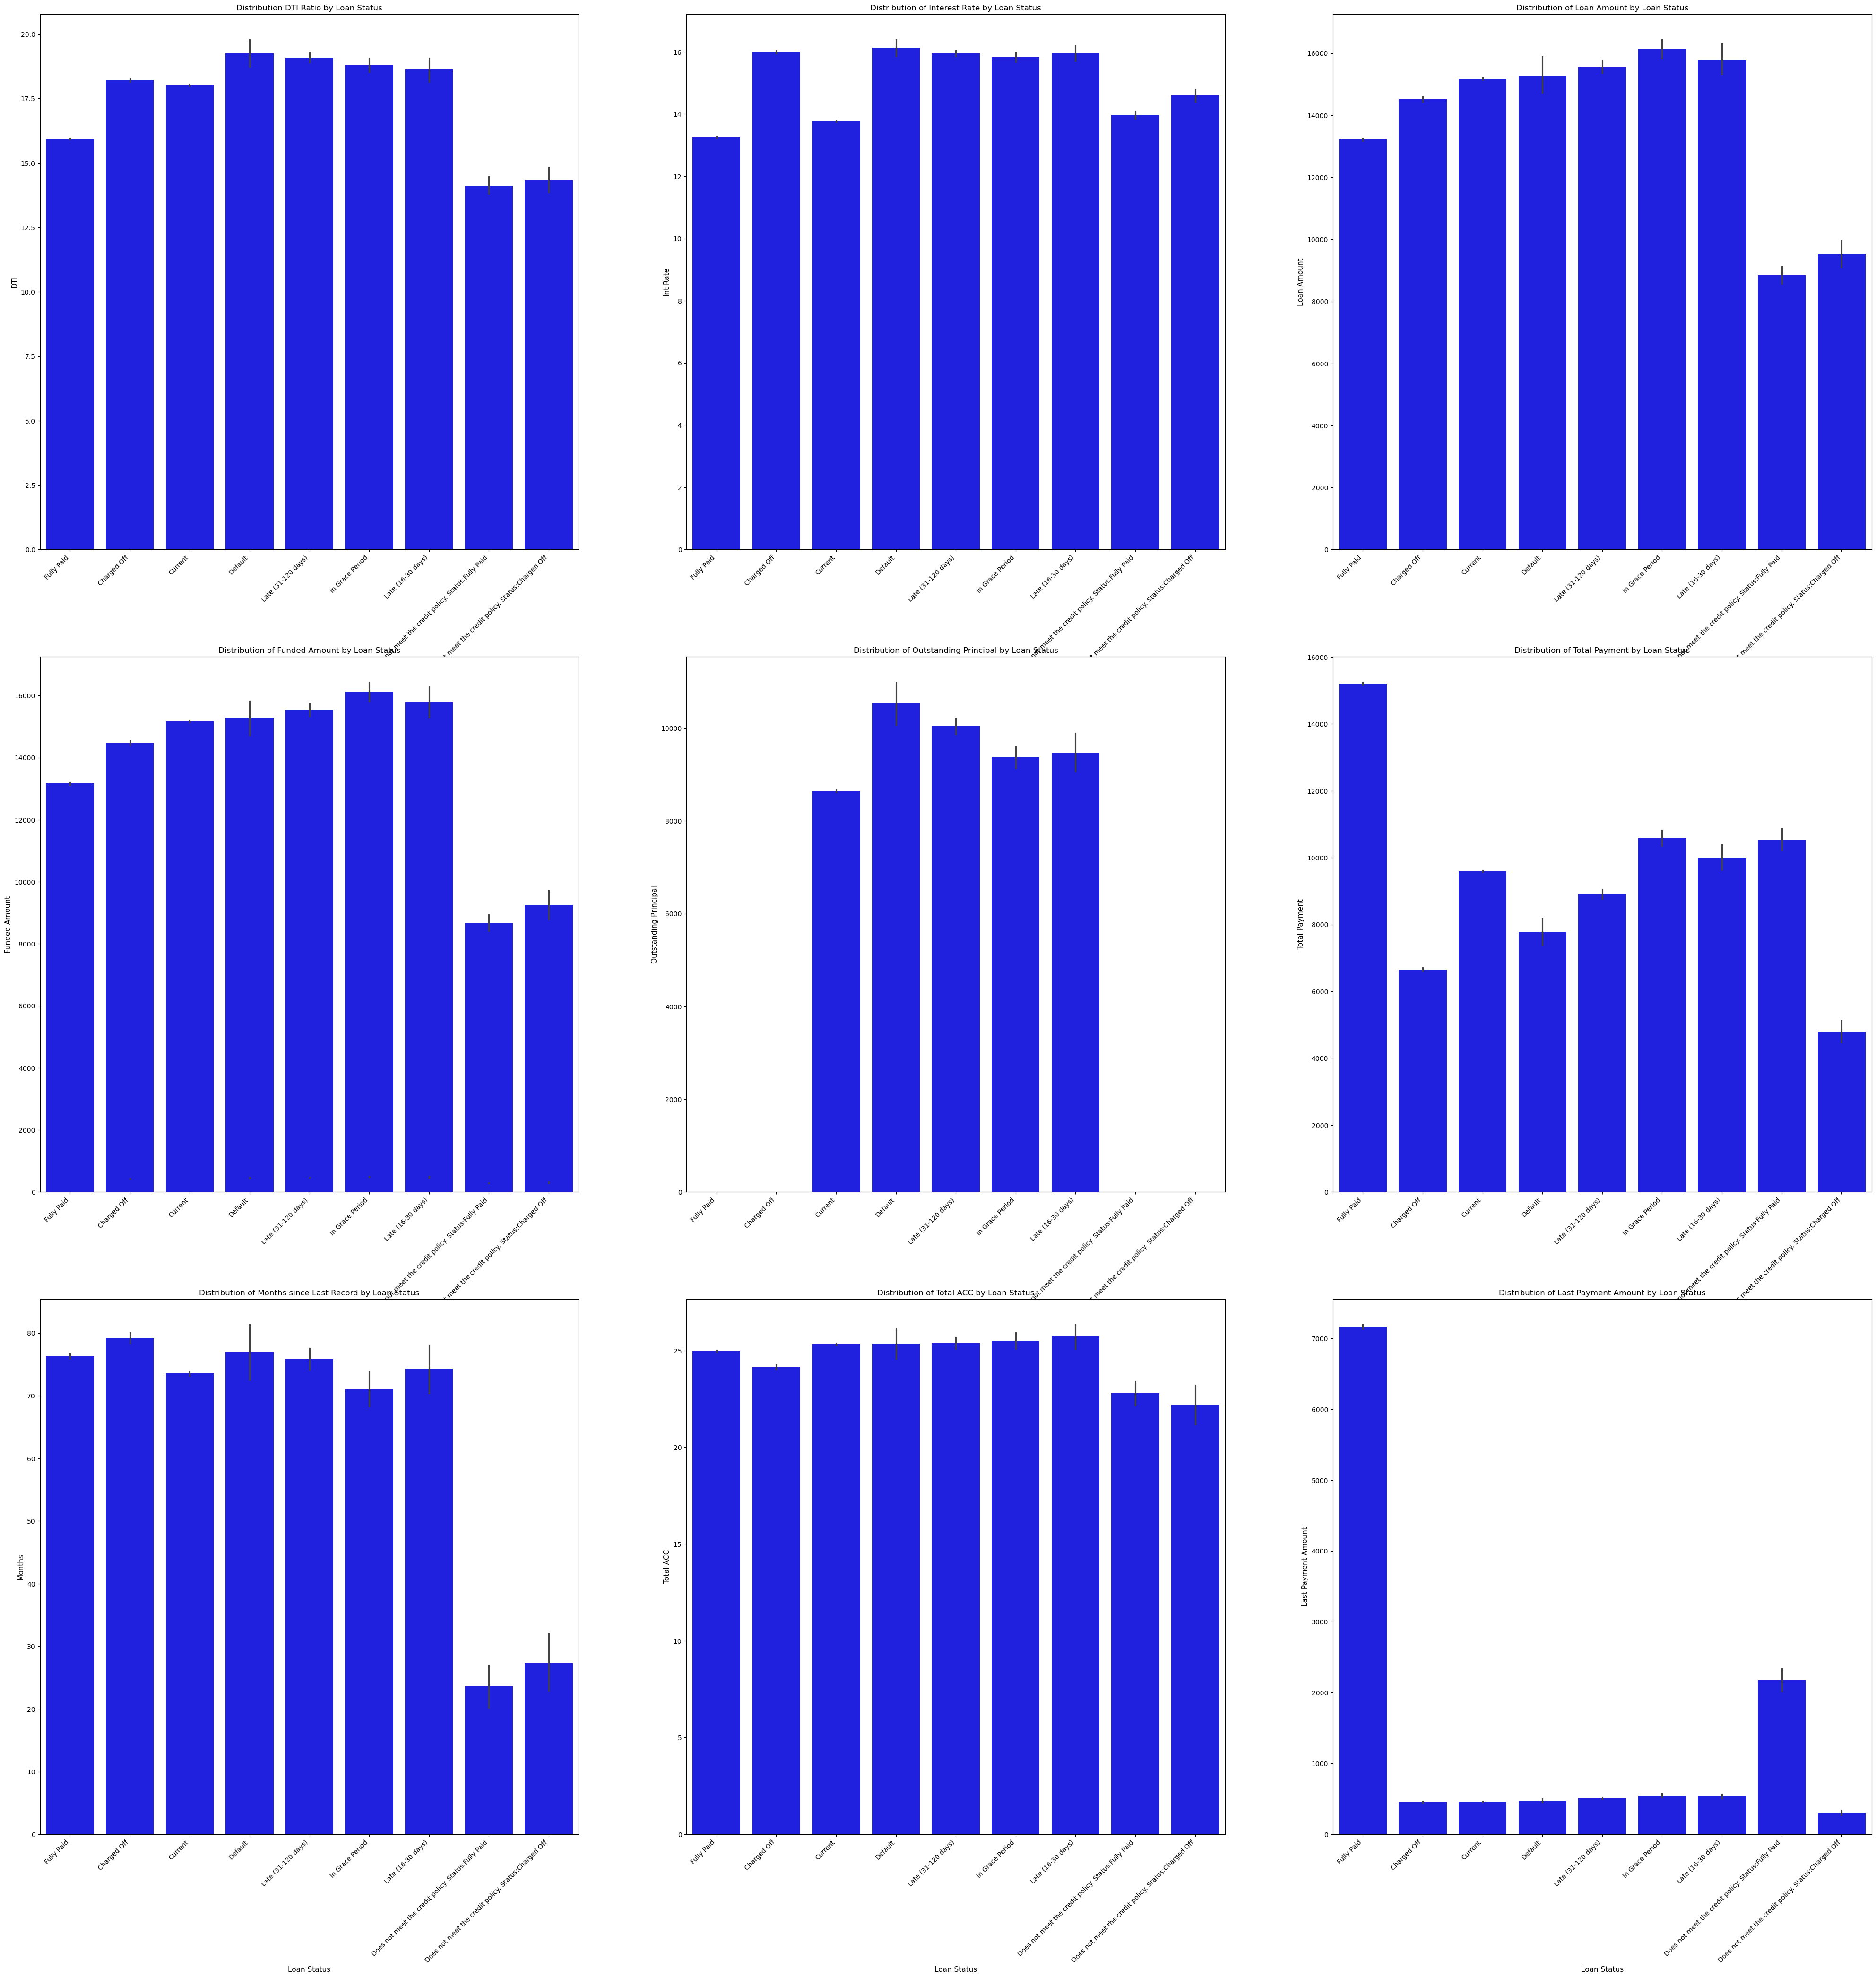

In [14]:
plt.figure(figsize=(50,50))

# dti by loan status
plt.subplot(3,3,1)
sns.barplot(data=df, x='loan_status', y='dti', color='blue')
plt.title('Distribution DTI Ratio by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('DTI', fontsize=11)
plt.xticks(rotation=45, ha='right')

# int rate by loan status
plt.subplot(3,3,2)
sns.barplot(data=df, x='loan_status', y='int_rate', color='blue')
plt.title('Distribution of Interest Rate by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Int Rate', fontsize=11)
plt.xticks(rotation=45, ha='right')

# loan amnt by loan status
plt.subplot(3,3,3)
sns.barplot(data=df, x='loan_status', y='loan_amnt', color='blue')
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Loan Amount', fontsize=11)
plt.xticks(rotation=45, ha='right')

# Installment by loan status
plt.subplot(3,3,4)
sns.barplot(data=df, x='loan_status', y='installment', color='blue')
plt.title('Distribution of Installment by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Installment', fontsize=11)
plt.xticks(rotation=45, ha='right')

# funded amount by loan status
plt.subplot(3,3,4)
sns.barplot(data=df, x='loan_status', y='funded_amnt', color='blue')
plt.title('Distribution of Funded Amount by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Funded Amount', fontsize=11)
plt.xticks(rotation=45, ha='right')

# outstanding principal by Loan Status
plt.subplot(3,3,5)
sns.barplot(data=df, x='loan_status', y='out_prncp', color='blue')
plt.title('Distribution of Outstanding Principal by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Outstanding Principal', fontsize=11)
plt.xticks(rotation=45, ha='right')

# total payment by Loan Status
plt.subplot(3,3,6)
sns.barplot(data=df, x='loan_status', y='total_pymnt', color='blue')
plt.title('Distribution of Total Payment by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Total Payment', fontsize=11)
plt.xticks(rotation=45, ha='right')

# total mths_since_last_record by loan status
plt.subplot(3,3,7)
sns.barplot(data=df, x='loan_status', y='mths_since_last_record', color='blue')
plt.title('Distribution of Months since Last Record by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Months', fontsize=11)
plt.xticks(rotation=45, ha='right')

# total ACC by loan status
plt.subplot(3,3,8)
sns.barplot(data=df, x='loan_status', y='total_acc', color='blue')
plt.title('Distribution of Total ACC by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Total ACC', fontsize=11)
plt.xticks(rotation=45, ha='right')

# total last payment amount by loan status
plt.subplot(3,3,9)
sns.barplot(data=df, x='loan_status', y='last_pymnt_amnt', color='blue')
plt.title('Distribution of Last Payment Amount by Loan Status')
plt.xlabel('Loan Status', fontsize=11)
plt.ylabel('Last Payment Amount', fontsize=11)
plt.xticks(rotation=45, ha='right')


In [15]:
df[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,449734,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,5,35,205475,11,6,3,91,9,2,...,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'Default'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'In Grace Period'),
  Text(6, 0, 'Late (16-30 days)'),
  Text(7, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(8, 0, 'Does not meet the credit policy. Status:Charged Off')])

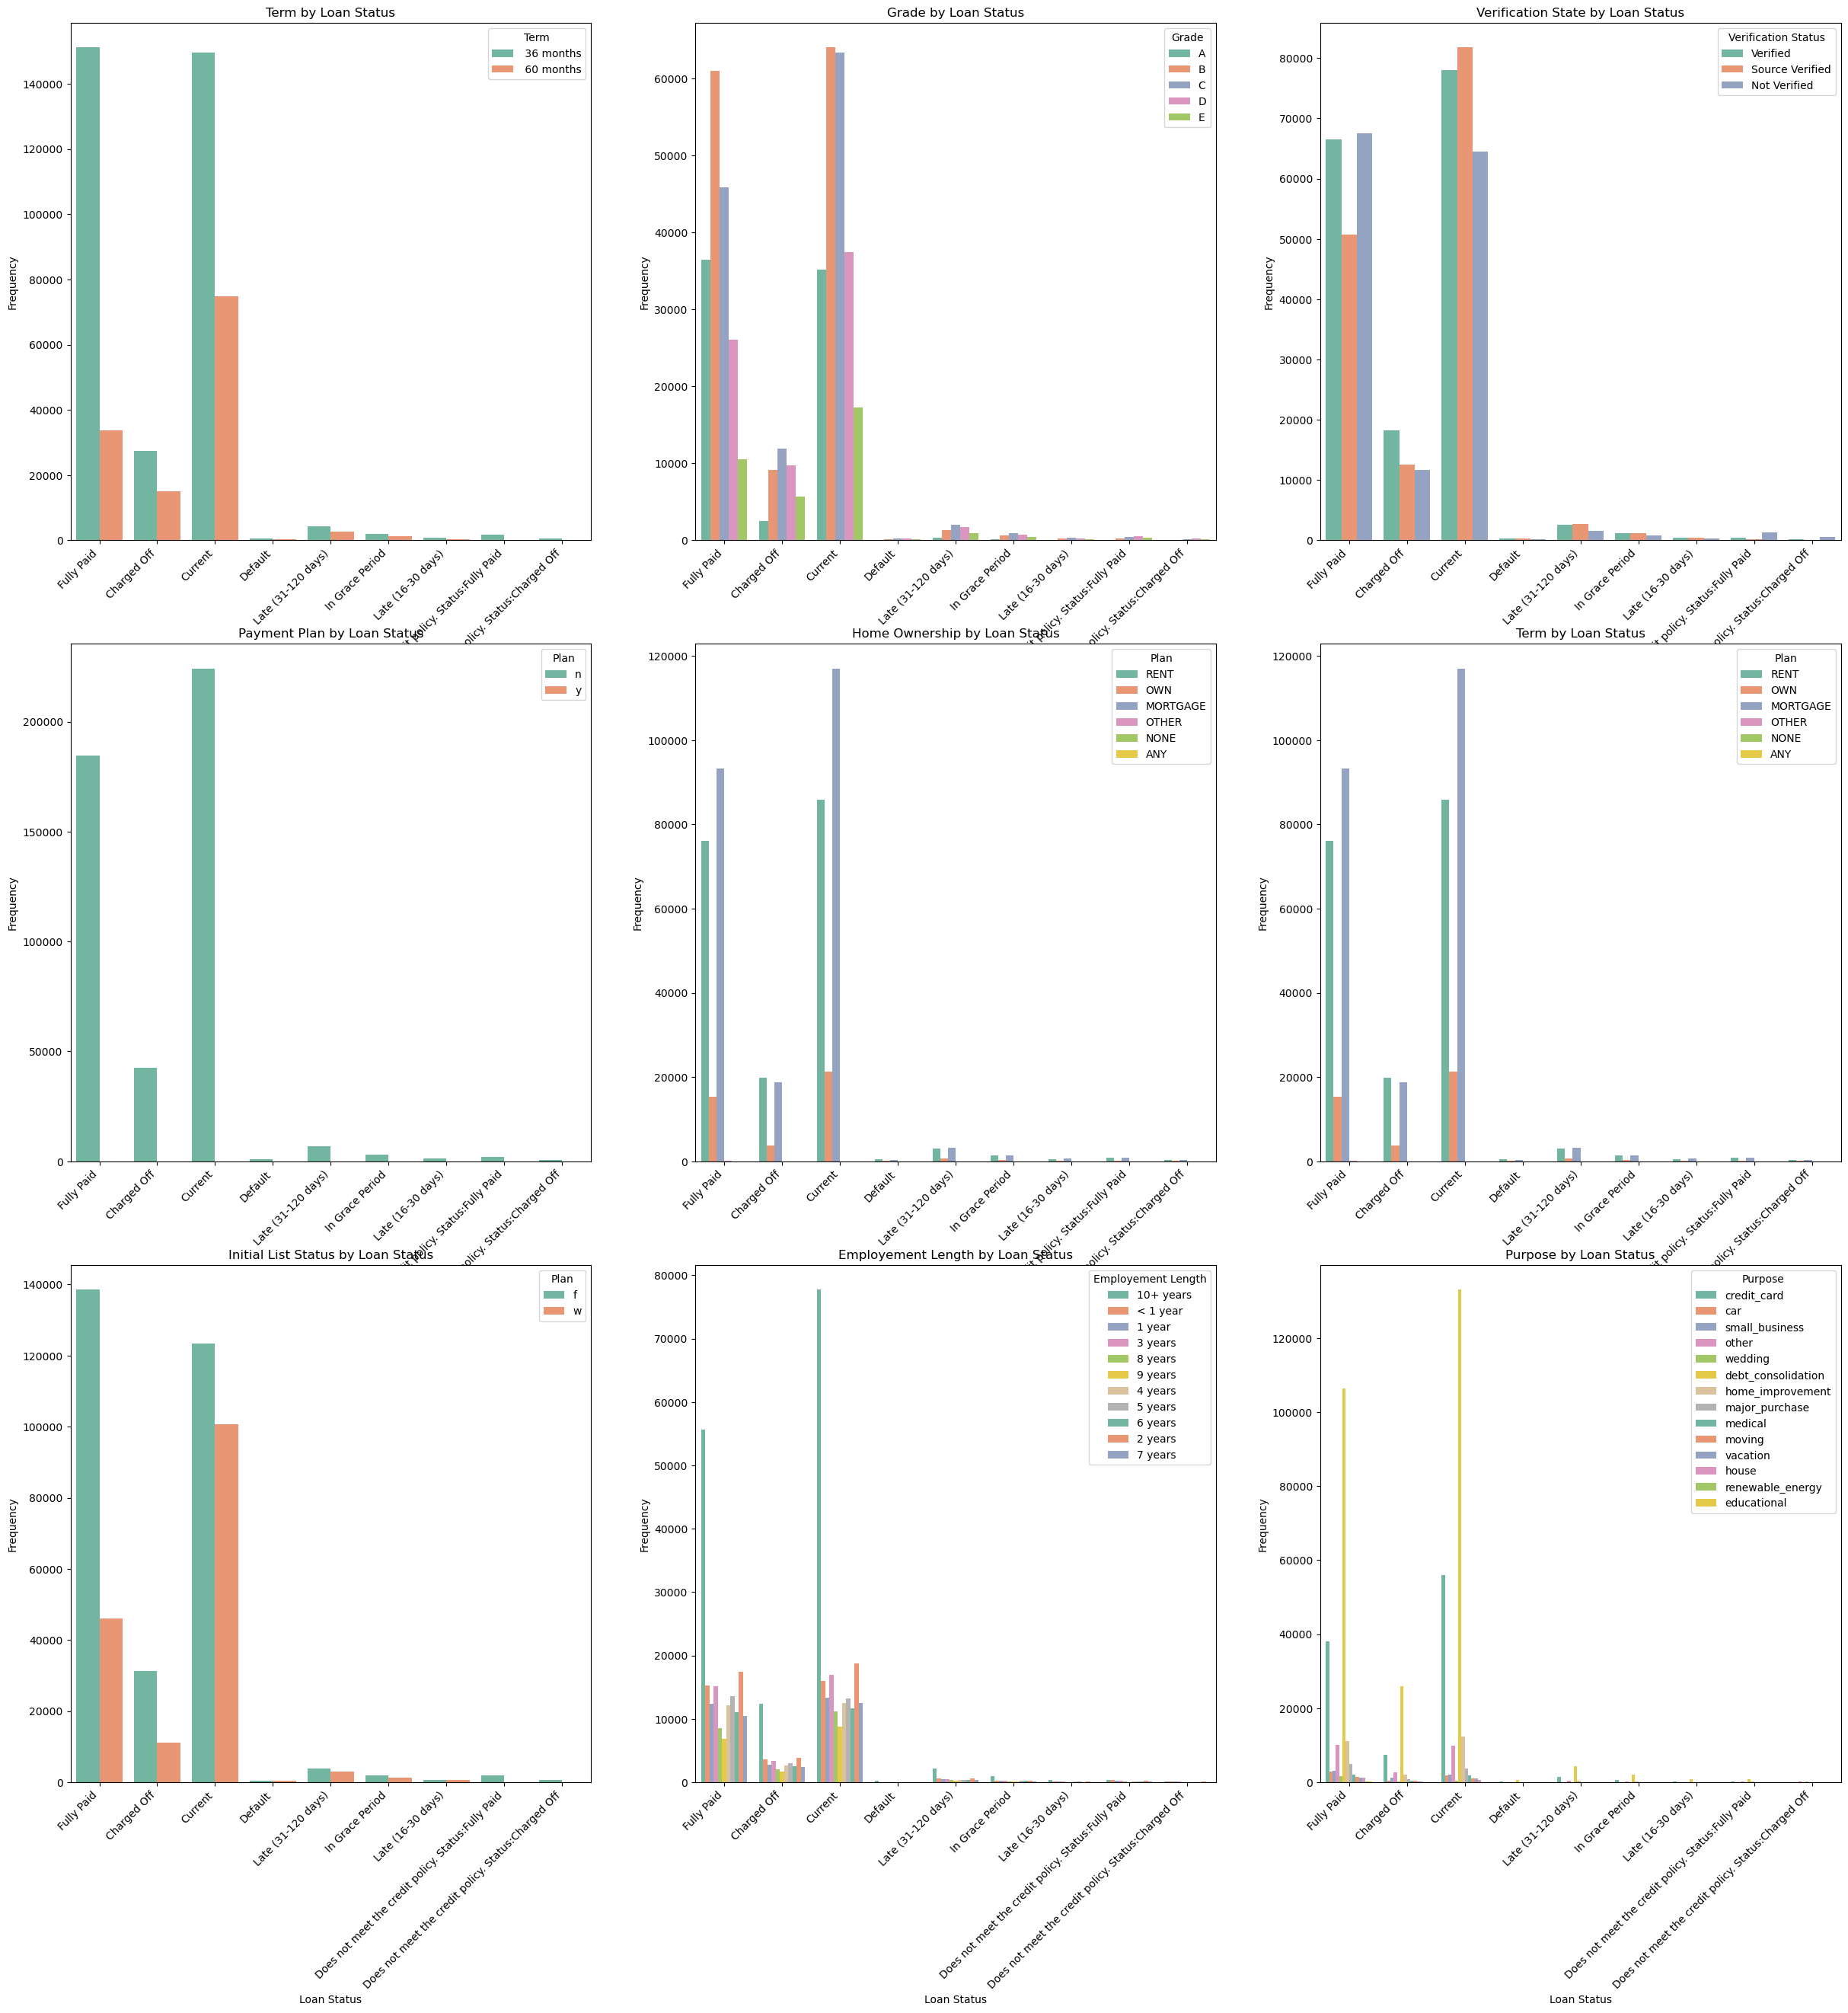

In [16]:
plt.figure(figsize=(30,30))

# term by loan status
plt.subplot(3,3,1)
sns.countplot(data=df, x='loan_status', hue='term', palette='Set2')
plt.xlabel('Loan Status', fontsize=10)
plt.ylabel('Frequency')
plt.legend(title='Term')
plt.title('Term by Loan Status')
plt.xticks(rotation=45, ha='right')

# grade by Loan Status
plt.subplot(3,3,2)
sns.countplot(data=df, x='loan_status', hue='grade', palette='Set2')
plt.xlabel('Loan Status', fontsize=10)
plt.ylabel('Frequency')
plt.legend(title='Grade')
plt.title('Grade by Loan Status')
plt.xticks(rotation=45, ha='right')

# verification status by loan status
plt.subplot(3,3,3)
sns.countplot(data=df, x='loan_status', hue='verification_status', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.legend(title='Verification Status')
plt.title('Verification State by Loan Status')
plt.xticks(rotation=45, ha='right')

# pymnt plan by loan status
plt.subplot(3,3,4)
sns.countplot(data=df, x='loan_status', hue='pymnt_plan', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.title('Payment Plan by Loan Status')
plt.xticks(rotation=45, ha='right')

# home ownership by loan status
plt.subplot(3,3,5)
sns.countplot(data=df, x='loan_status', hue='home_ownership', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.title('Home Ownership by Loan Status')
plt.xticks(rotation=45, ha='right')

# home ownership by loan status
plt.subplot(3,3,6)
sns.countplot(data=df, x='loan_status', hue='home_ownership', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.title('Term by Loan Status')
plt.xticks(rotation=45, ha='right')

# initial_list_status by loan status
plt.subplot(3,3,7)
sns.countplot(data=df, x='loan_status', hue='initial_list_status', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.title('Initial List Status by Loan Status')
plt.xticks(rotation=45, ha='right')

# emp_length by loan status
plt.subplot(3,3,8)
sns.countplot(data=df, x='loan_status', hue='emp_length', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.legend(title='Employement Length')
plt.title('Employement Length by Loan Status')
plt.xticks(rotation=45, ha='right')

# purpose by loan status
plt.subplot(3,3,9)
sns.countplot(data=df, x='loan_status', hue='purpose', palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.legend(title='Purpose')
plt.title('Purpose by Loan Status')
plt.xticks(rotation=45, ha='right')


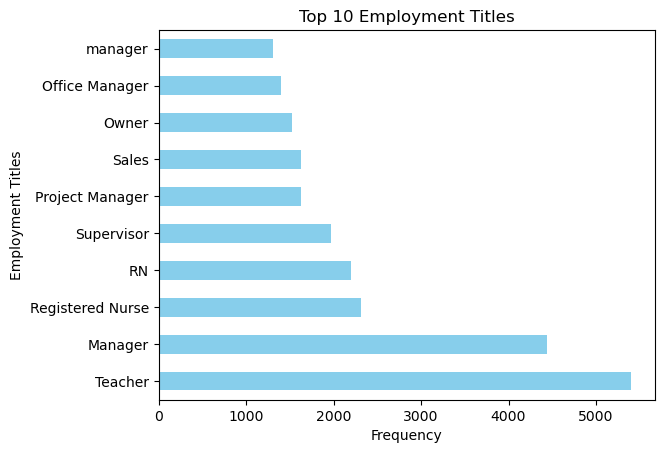

In [17]:
# top 10 emp_titles
top_10_emp_titles = df['emp_title'].value_counts().head(10)
top_10_emp_titles.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Employment Titles')
plt.title('Top 10 Employment Titles')
plt.show()

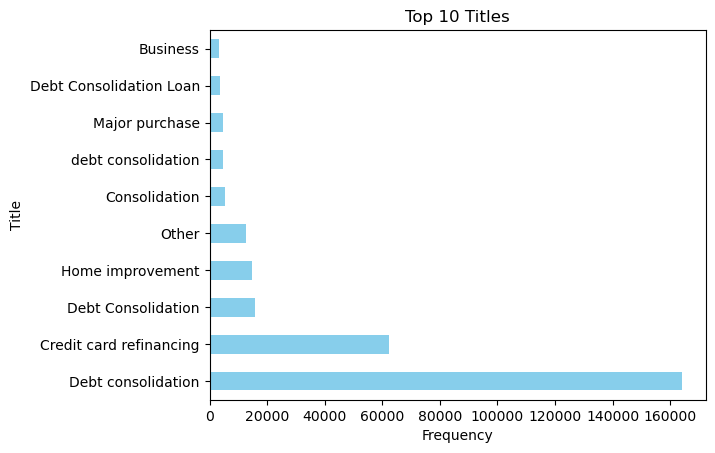

In [18]:
# top 10 title
top_10_titles = df['title'].value_counts().head(10)
top_10_titles.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Title')
plt.title('Top 10 Titles')
plt.show()

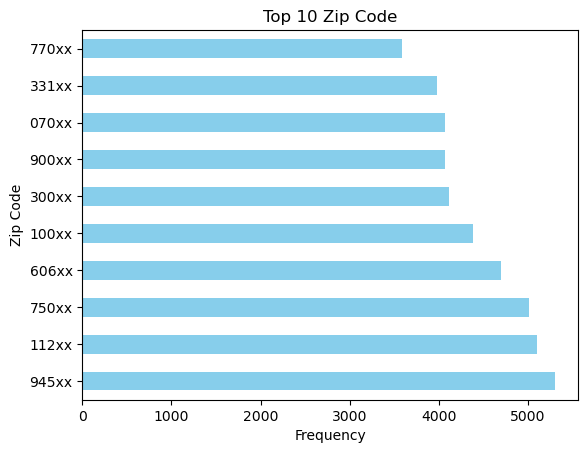

In [19]:
# top 10 zip code
top_10_zip_code = df['zip_code'].value_counts().head(10)
top_10_zip_code.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Zip Code')
plt.title('Top 10 Zip Code')
plt.show()

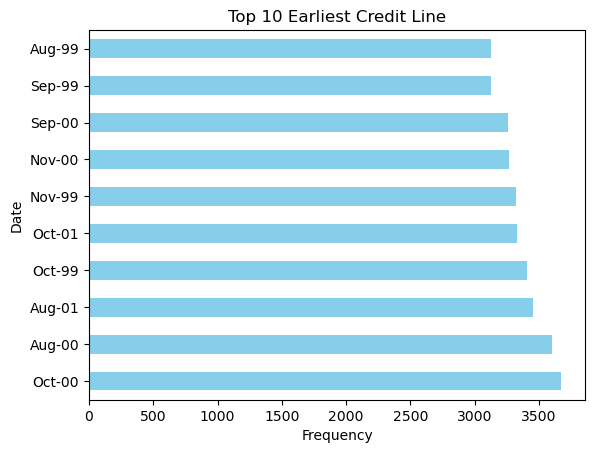

In [20]:
# earliest credit line
top_10_earlies_cr_line = df['earliest_cr_line'].value_counts().head(10)
top_10_earlies_cr_line.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Date')
plt.title('Top 10 Earliest Credit Line')
plt.show()

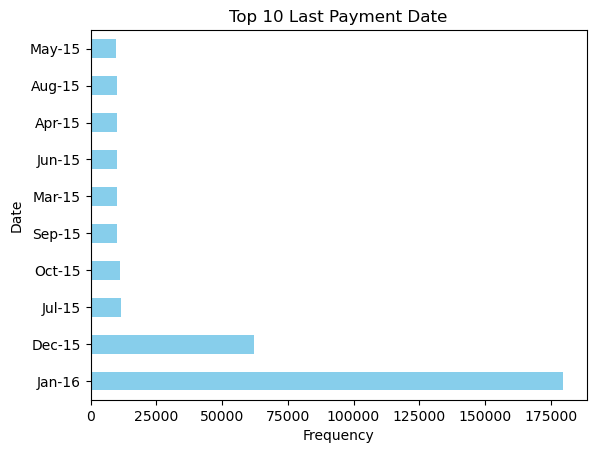

In [21]:
# top 10 last payment date
top_10_last_pymnt_date = df['last_pymnt_d'].value_counts().head(10)
top_10_last_pymnt_date.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Date')
plt.title('Top 10 Last Payment Date')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Unnamed: 0                   466285 non-null  int64   
 1   id                           466285 non-null  int64   
 2   member_id                    466285 non-null  int64   
 3   loan_amnt                    466285 non-null  int64   
 4   funded_amnt                  466285 non-null  int64   
 5   funded_amnt_inv              466285 non-null  float64 
 6   term                         466285 non-null  object  
 7   int_rate                     466285 non-null  float64 
 8   installment                  466285 non-null  float64 
 9   grade                        449734 non-null  category
 10  sub_grade                    466285 non-null  category
 11  emp_title                    438697 non-null  object  
 12  emp_length                   445277 non-null

### Insight Summary

- Data distributions were relatively skewed and bimodals.
- `loan_status` column was chosen as target variable. The majority of loan status is 'Current'

# Preprocessing

## Handle Missing Values

In [23]:
df.shape # before missing values handling

(466285, 75)

In [24]:
# calculate null percentage 
null_percentage = df.isnull().mean() *100

# drop columns with null more than 10%
columns_to_drop = null_percentage[null_percentage >= 10].index

df = df.drop(columns=columns_to_drop)
df.shape # data shape after missing values handling

(466285, 50)

In [25]:
# clean missing value once more
df = df.dropna()
df.shape 

(422158, 50)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422158 entries, 1 to 466283
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Unnamed: 0                  422158 non-null  int64   
 1   id                          422158 non-null  int64   
 2   member_id                   422158 non-null  int64   
 3   loan_amnt                   422158 non-null  int64   
 4   funded_amnt                 422158 non-null  int64   
 5   funded_amnt_inv             422158 non-null  float64 
 6   term                        422158 non-null  object  
 7   int_rate                    422158 non-null  float64 
 8   installment                 422158 non-null  float64 
 9   grade                       422158 non-null  category
 10  sub_grade                   422158 non-null  category
 11  emp_title                   422158 non-null  object  
 12  emp_length                  422158 non-null  object  
 13  home

## Handle Outliers

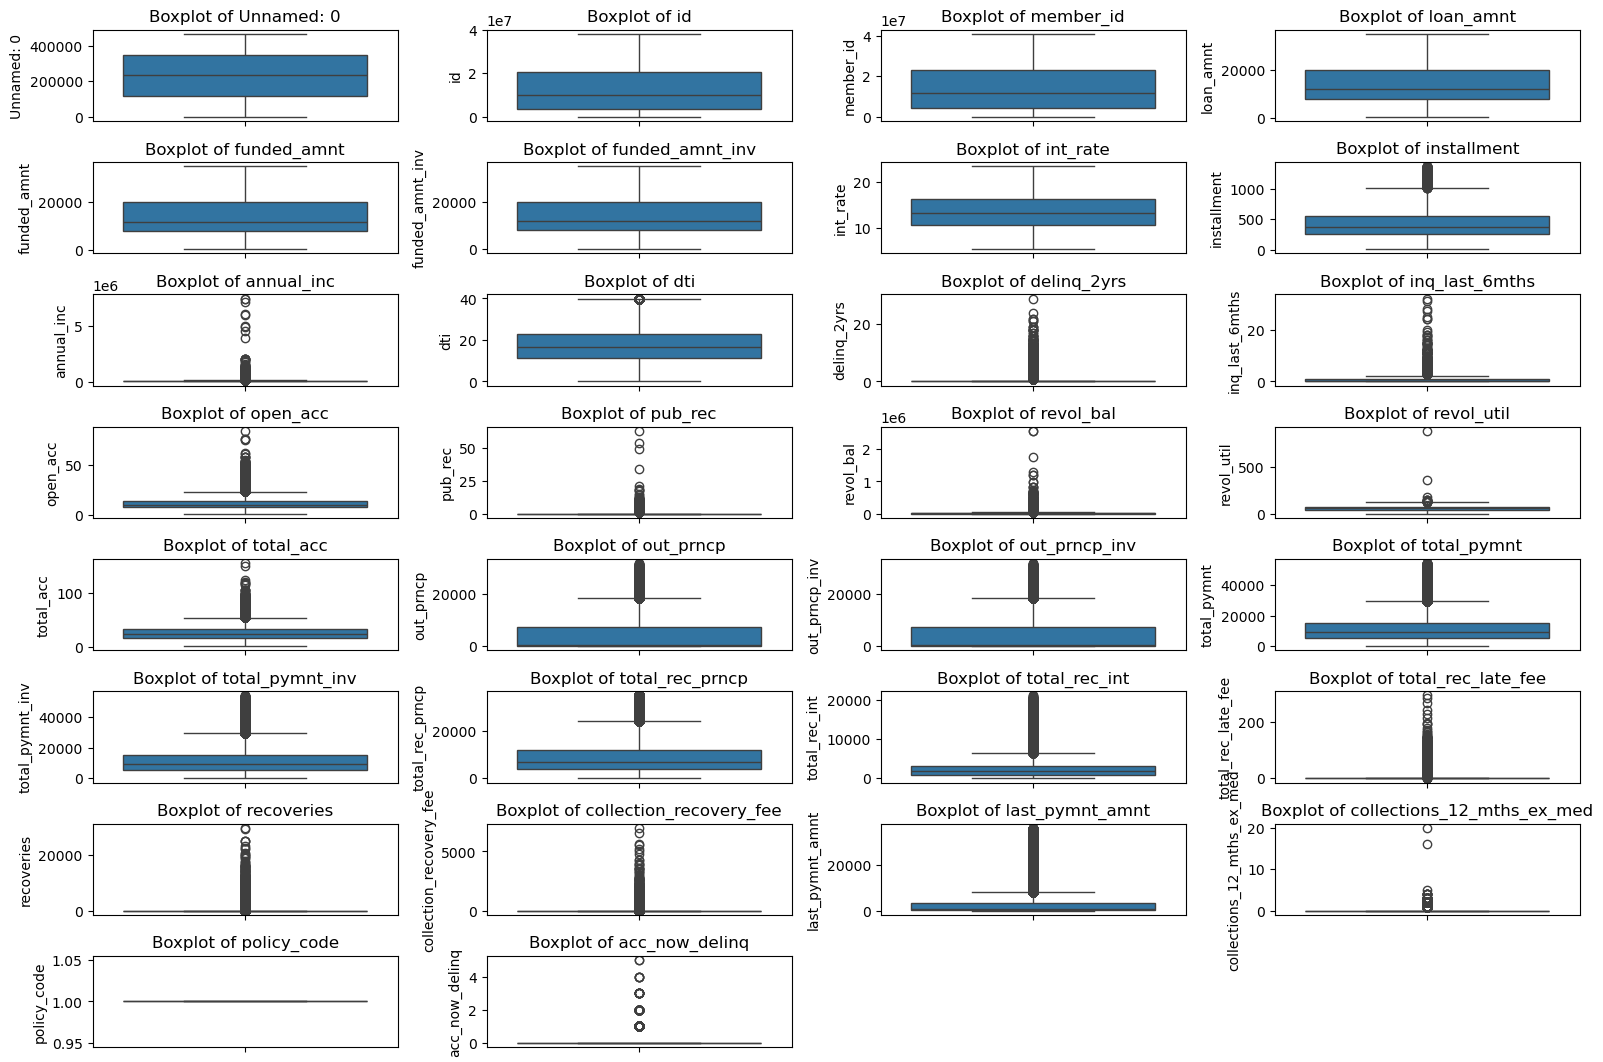

In [27]:
numerical = df.select_dtypes(include='number').columns
plt.figure(figsize=(16,12))
for i, num in enumerate(numerical,1):
    plt.subplot(9,4,i)
    sns.boxplot(df[num])
    plt.title(f'Boxplot of {num}')
plt.tight_layout()
plt.show()

## Feature Engineering

In [28]:
df.drop(columns=['Unnamed: 0'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0.0,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466279,9745484,11597572,15000,15000,15000.0,36 months,13.53,509.25,B,B5,...,0.00,0.00,0.00,Jan-16,509.25,Jan-16,0.0,1,INDIVIDUAL,0.0
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,0.00,0.00,0.00,Jan-16,432.64,Jan-16,0.0,1,INDIVIDUAL,0.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,0.00,0.00,0.00,Dec-14,17.50,Jan-16,0.0,1,INDIVIDUAL,0.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,0.00,0.00,0.00,Jan-16,514.34,Dec-15,0.0,1,INDIVIDUAL,0.0


In [29]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [30]:
# extracting features to create class label
accepted_status = ['Fully Paid','Current','In Grace Period']
df['acceptance'] = df['loan_status'].apply(lambda x:1 if x in accepted_status else 0)


In [31]:
# change object datatype columns to numeric

# employment length
df['emp_length'] = df['emp_length'].replace({
    '< 1 year': '0',
    '10+ years': '10'
}) 
df['emp_length'] = df['emp_length'].str.replace(' years', '').str.replace(' year', '')  # Hapus teks
df['emp_length'] = df['emp_length'].astype(int) 

# payment plan
df['pymnt_plan'] = df['pymnt_plan'].replace({
    'y' : '1',
    'n' : '0'
})
df['pymnt_plan'] = df['pymnt_plan'].astype(int)

# term
df['term'] = df['term'].str.extract('(\d+)').astype(int)


<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\putri\AppData\Local\Temp\ipykernel_20492\3992890979.py:19: SyntaxWarning: invalid escape sequence '\d'
  df['term'] = df['term'].str.extract('(\d+)').astype(int)


In [32]:
# change categorical column into numerics with label encoding

# verification status
df['verification_status'] = df['verification_status'].replace({
    'Source Verified' : '2',
    'Not Verified' : '0',
    'Verified' : '1'
})
df['verification_status']= df['verification_status'].astype(int)

# grade
df['grade'] = df['grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4})
df['grade'] = df['grade'].astype(int)

In [33]:
# change categorical columns into numerics with one hot encoding
df = pd.get_dummies(df, columns = ['initial_list_status','home_ownership', 'purpose'], drop_first=False)

In [34]:
# change datetime type column into integer datatype

# last payment date
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_pymnt_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_month'] = df['last_pymnt_d'].dt.month
df.drop(columns=['last_pymnt_d'], inplace=True)

# issue date
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df.drop(columns=['issue_d'], inplace=True)

# earliest_cr_line
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df.drop(columns=['earliest_cr_line'], inplace=True)

# last_credit_pull_d
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['last_credit_pull_year'] = df['last_credit_pull_d'].dt.year
df['last_credit_pull_month'] = df['last_credit_pull_d'].dt.month
df.drop(columns=['last_credit_pull_d'], inplace=True)

In [35]:
# change boolean type columns into numerics
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422158 entries, 1 to 466283
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Unnamed: 0                  422158 non-null  int64   
 1   id                          422158 non-null  int64   
 2   member_id                   422158 non-null  int64   
 3   loan_amnt                   422158 non-null  int64   
 4   funded_amnt                 422158 non-null  int64   
 5   funded_amnt_inv             422158 non-null  float64 
 6   term                        422158 non-null  int32   
 7   int_rate                    422158 non-null  float64 
 8   installment                 422158 non-null  float64 
 9   grade                       422158 non-null  int32   
 10  sub_grade                   422158 non-null  category
 11  emp_title                   422158 non-null  object  
 12  emp_length                  422158 non-null  int32   
 13  annu

## Data Splitting

In [37]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['number']).drop(columns=['acceptance']).columns.tolist()

In [38]:
# data splitting for 30% for test and 70% for train
from sklearn.model_selection import train_test_split
X = df[numerical]
y = df['acceptance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
df_st = df.copy()
scaler = StandardScaler()
df_st[numerical] = scaler.fit_transform(df_st[numerical])

## Feature Selection

In [40]:
# calculate the mutual information score between features and target column
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

selected_features = pd.DataFrame({'Feature': selected_columns,
                                  'Mutual Information Score': scores
                    }).sort_values(by='Mutual Information Score', ascending=False).reset_index().drop(columns='index')

selected_features

,Feature,Mutual Information Score
0,recoveries,0.115449
1,collection_recovery_fee,0.110573
2,total_rec_prncp,0.103768
3,last_pymnt_year,0.054237
4,last_pymnt_amnt,0.052308
...,...,...
60,acc_now_delinq,0.000000
61,policy_code,0.000000
62,earliest_cr_line_month,0.000000
63,verification_status,0.000000


In [41]:
selected_features = selected_features[selected_features['Mutual Information Score'] >= 0.01]['Feature'].tolist()
print(selected_features)

['recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'last_pymnt_year', 'last_pymnt_amnt', 'last_pymnt_month', 'total_pymnt', 'total_pymnt_inv', 'out_prncp', 'out_prncp_inv', 'int_rate', 'Unnamed: 0', 'total_rec_int', 'installment', 'last_credit_pull_year', 'grade', 'total_rec_late_fee']


## Standardization

In [42]:
# standardization with standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

## Class Imbalance

In [43]:
# before handling class imbalance
value_counts = y_train.value_counts()
total_counts = len(y_train)
class_percentage = (value_counts/total_counts)*100

print(value_counts, round(class_percentage),2)

acceptance
1    263725
0     31785
Name: count, dtype: int64 acceptance
1    89.0
0    11.0
Name: count, dtype: float64 2


In [44]:
# handle class imbalance with undersampling

from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled['acceptance'] = y_train_resampled

undersampling = pd.Series(y_train_resampled).value_counts()
print('Class After Undersampling')
print(undersampling)

Class After Undersampling
acceptance
0    31785
1    31785
Name: count, dtype: int64


## Export Pre-Processed File


In [45]:
y_train_file = pd.Series(y_train_resampled, name='acceptance')
y_test_file = pd.Series(y_test, name='acceptance')

In [46]:
# file merging
train_merged = pd.concat([X_train_resampled[selected_features].reset_index(drop=True), y_train_file.reset_index(drop=True)], axis=1)
test_merged = pd.concat([X_test_scaled[selected_features].reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [47]:
# export to CSV
train_merged.to_csv('TrainData.csv', index=False)
test_merged.to_csv('TestData.csv', index=False)

### Insight Summary

- To reduce less informative columns, missing values was handled. Columns with missing values more than 10% were dropped, and rows with missing values were dropped as well
- Outliers were not handled to keep real data since in loan credit, the amount of all variables relatively various.
- Feature engineering were conducted to convert data types to become numerics.
- Acceptance column was created as class label by extracting data from Loan Status
- Data were splitted into 70% train and 30% test
- Features with more than 0.01 Mutual Informative Score were selected by SelectKBest
- Standardization using StandardScaler was chosen since it was more common to be implemented in binary classification model
- Class Imbalance was done by undersampling to avoid overfitting

# Modelling

## Import Data

In [58]:
df_train = pd.read_csv('TrainData.csv')
df_test = pd.read_csv('TestData.csv')

In [63]:
X_train = df_train.drop(columns=['acceptance','Unnamed: 0'])
y_train = df_train['acceptance']
X_test = df_test.drop(columns=['acceptance','Unnamed: 0'])
y_test = df_test['acceptance']

## Import Libraries

In [64]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import time
from sklearn.model_selection import KFold

## Baseline Model

## Define Function for Model Evaluation

In [65]:
def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Initiate K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    accuracy_train_list = []
    f1_train_list = []
    precision_train_list = []
    recall_train_list = []
    roc_auc_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Train model with fold
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Calculate metrics at fold
        accuracy_train_list.append(accuracy_score(y_train_fold, y_train_pred))
        f1_train_list.append(f1_score(y_train_fold, y_train_pred))
        precision_train_list.append(precision_score(y_train_fold, y_train_pred))
        recall_train_list.append(recall_score(y_train_fold, y_train_pred))
        roc_auc_train_list.append(roc_auc_score(y_train_fold, y_train_pred))

    # Mean of metrics in train data
    accuracy_train = np.mean(accuracy_train_list)
    f1_train = np.mean(f1_train_list)
    precision_train = np.mean(precision_train_list)
    recall_train = np.mean(recall_train_list)
    roc_auc_train = np.mean(roc_auc_train_list)
    
    # Train model with all train data for evaluation
    model.fit(X_train, y_train)
    
    # Calculate prediction for test data
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    # Calculate residual in train and test data
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    plt.figure(figsize=(10, 10))

    # Residuals vs Predicted Values (Train)
    plt.subplot(2, 2, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')

    # Residuals vs Predicted Values (Test)
    plt.subplot(2, 2, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')

    # Actual vs Predicted Values (Train)
    plt.subplot(2, 2, 3)
    plt.scatter(y_train, y_train_pred, color='purple', alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Train)')
    plt.xlabel('Actual Values (Train)')
    plt.ylabel('Predicted Values (Train)')

    # Actual vs Predicted Values (Test)
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values (Test)')
    plt.ylabel('Predicted Values (Test)')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'F1-Score Train': f1_train,
        'F1-Score Test': f1_test,
        'Precision Train': precision_train,
        'Precision Test': precision_test,
        'Recall Train': recall_train,
        'Recall Test': recall_test,
     'ROC AUC Train': roc_auc_train,
    'ROC AUC Test': roc_auc_test
    }

results = []

### Logistic Regression

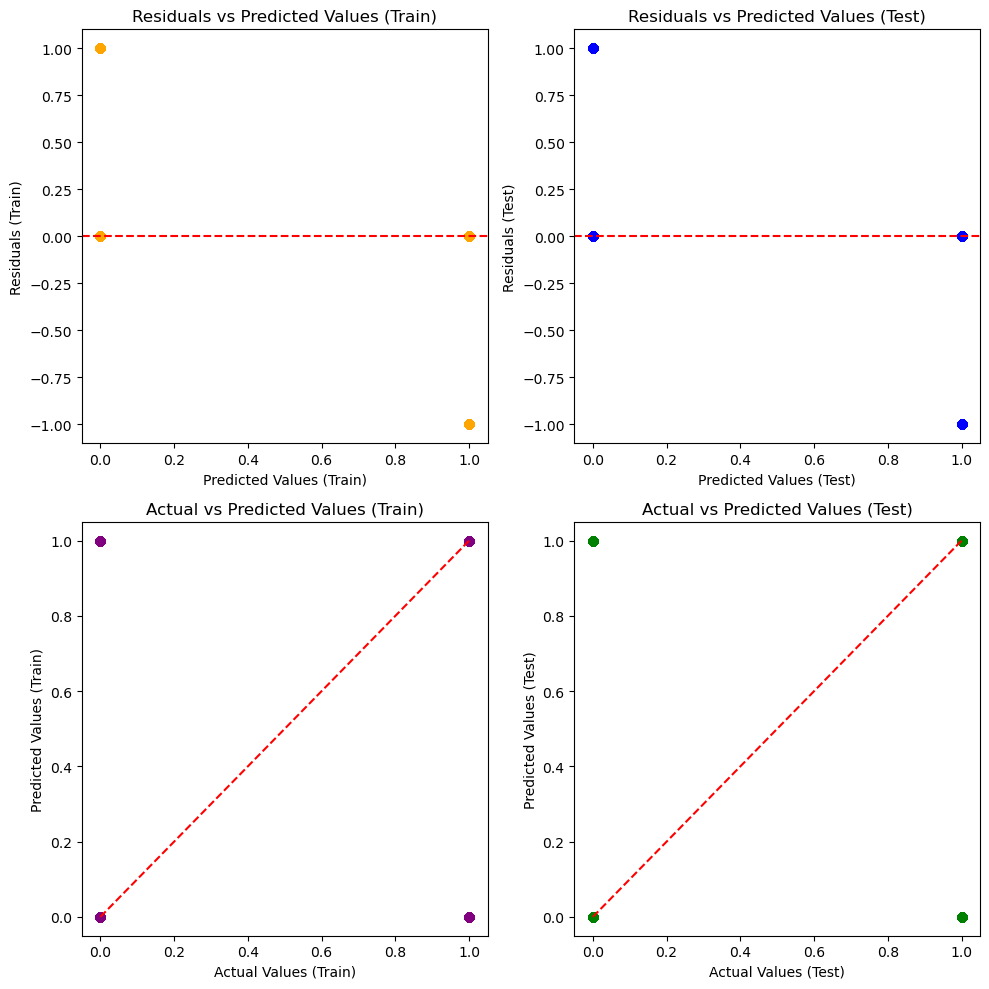

{'Model': 'Logistic Regression',
 'Training Time (s)': 4.828963756561279,
 'Accuracy Train': 0.9057417020607205,
 'Accuracy Test': 0.9148506095635146,
 'F1-Score Train': 0.9072893851372497,
 'F1-Score Test': 0.9505439069579733,
 'Precision Train': 0.8925952659665661,
 'Precision Test': 0.9859106692669933,
 'Recall Train': 0.9224756083417193,
 'Recall Test': 0.9176266414018435,
 'ROC AUC Train': 0.9057405773689905,
 'ROC AUC Test': 0.9048055896820317}

In [66]:
from sklearn.linear_model import LogisticRegression
lr_results = evaluate_model(LogisticRegression(random_state=42), 'Logistic Regression')
results.append(lr_results)
lr_results

### Random Forest

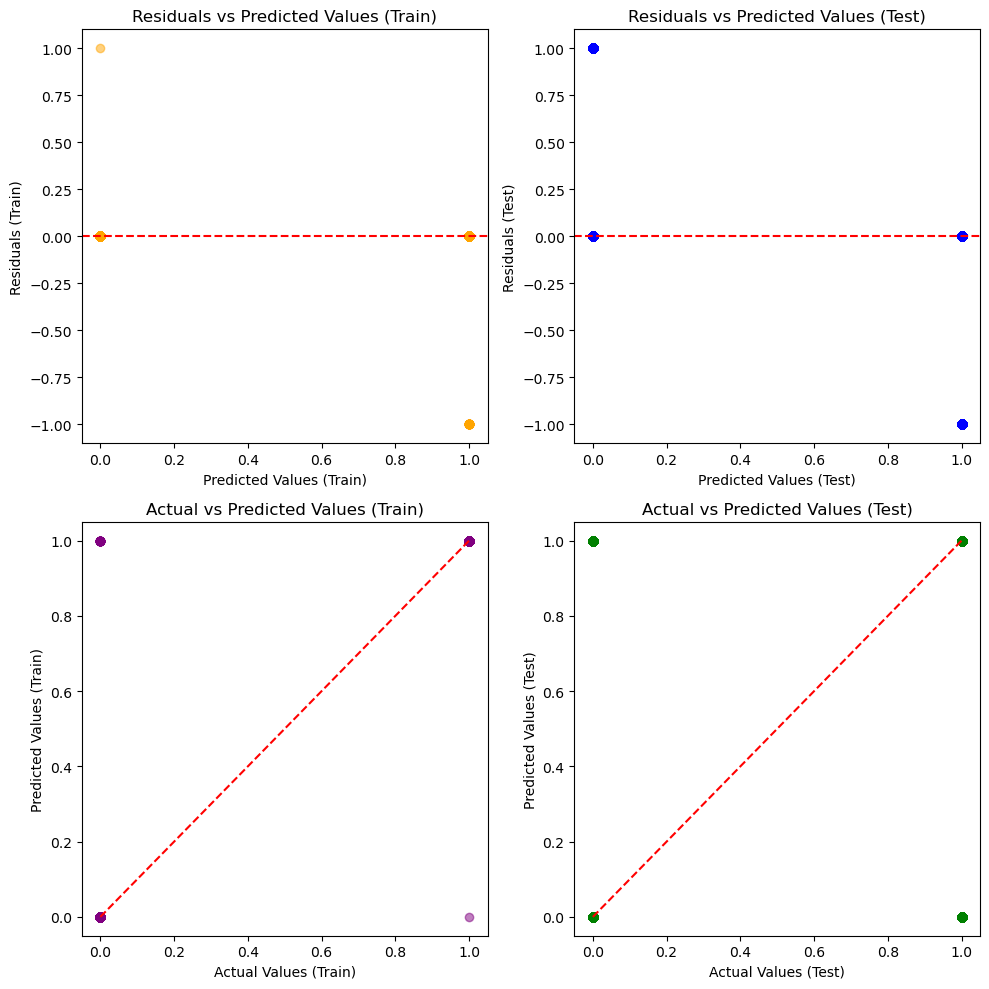

{'Model': 'Random Forest',
 'Training Time (s)': 83.59112858772278,
 'Accuracy Train': 0.9997247129148971,
 'Accuracy Test': 0.5478333649169351,
 'F1-Score Train': 0.9997248059346912,
 'F1-Score Test': 0.6615724653097889,
 'Precision Train': 0.9995125553213796,
 'Precision Test': 0.9946334962239005,
 'Recall Train': 0.9999371474787596,
 'Recall Test': 0.49561259817420333,
 'ROC AUC Train': 0.9997247415465714,
 'ROC AUC Test': 0.7367932438759575}

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_results = evaluate_model(RandomForestClassifier(random_state=42), 'Random Forest')
results.append(rf_results)
rf_results

### Decision Tree

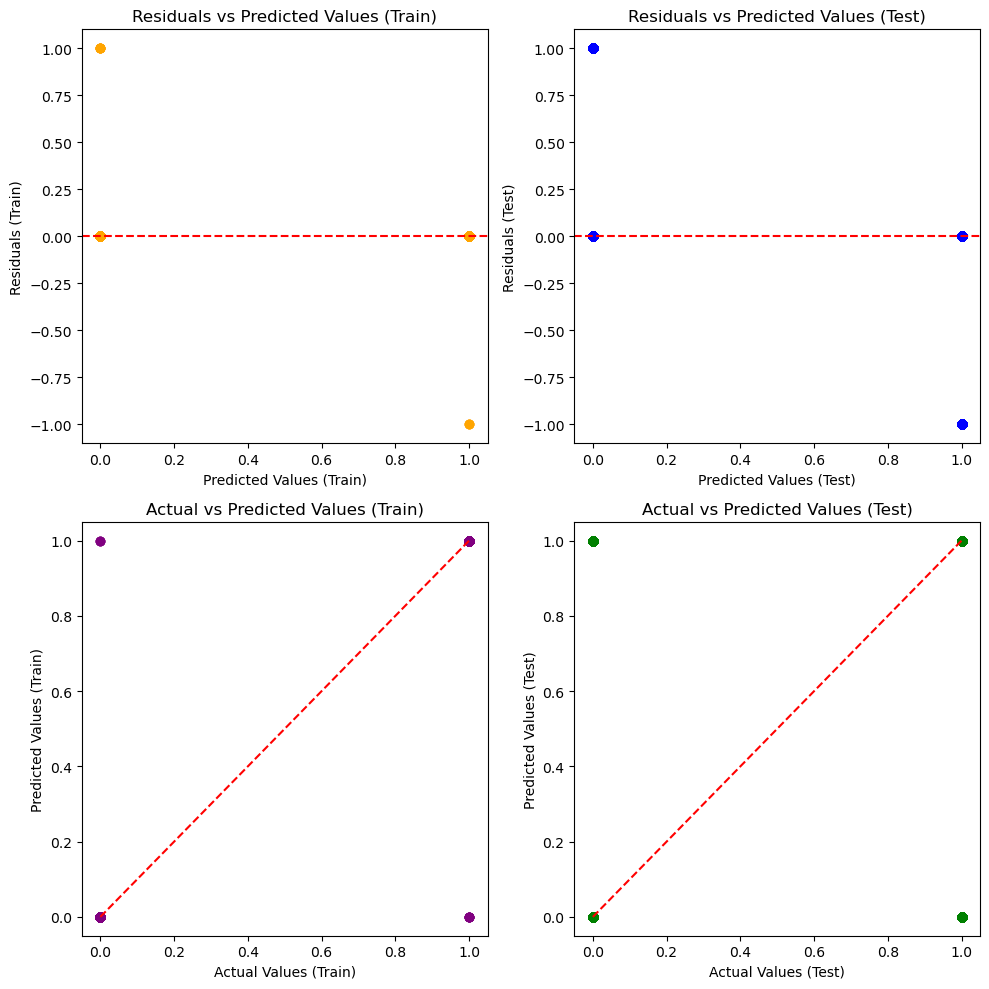

{'Model': 'Decision Tree',
 'Training Time (s)': 7.770901441574097,
 'Accuracy Train': 0.9997325782601857,
 'Accuracy Test': 0.9348588212999811,
 'F1-Score Train': 0.9997325431679277,
 'F1-Score Test': 0.9623676023829291,
 'Precision Train': 0.9998584547292871,
 'Precision Test': 0.9924639426469343,
 'Recall Train': 0.999606668027797,
 'Recall Test': 0.9340428734604248,
 'ROC AUC Train': 0.9997325120257566,
 'ROC AUC Test': 0.937811313471515}

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt_results = evaluate_model(DecisionTreeClassifier(random_state=42), 'Decision Tree')
results.append(dt_results)
dt_results

### KNN

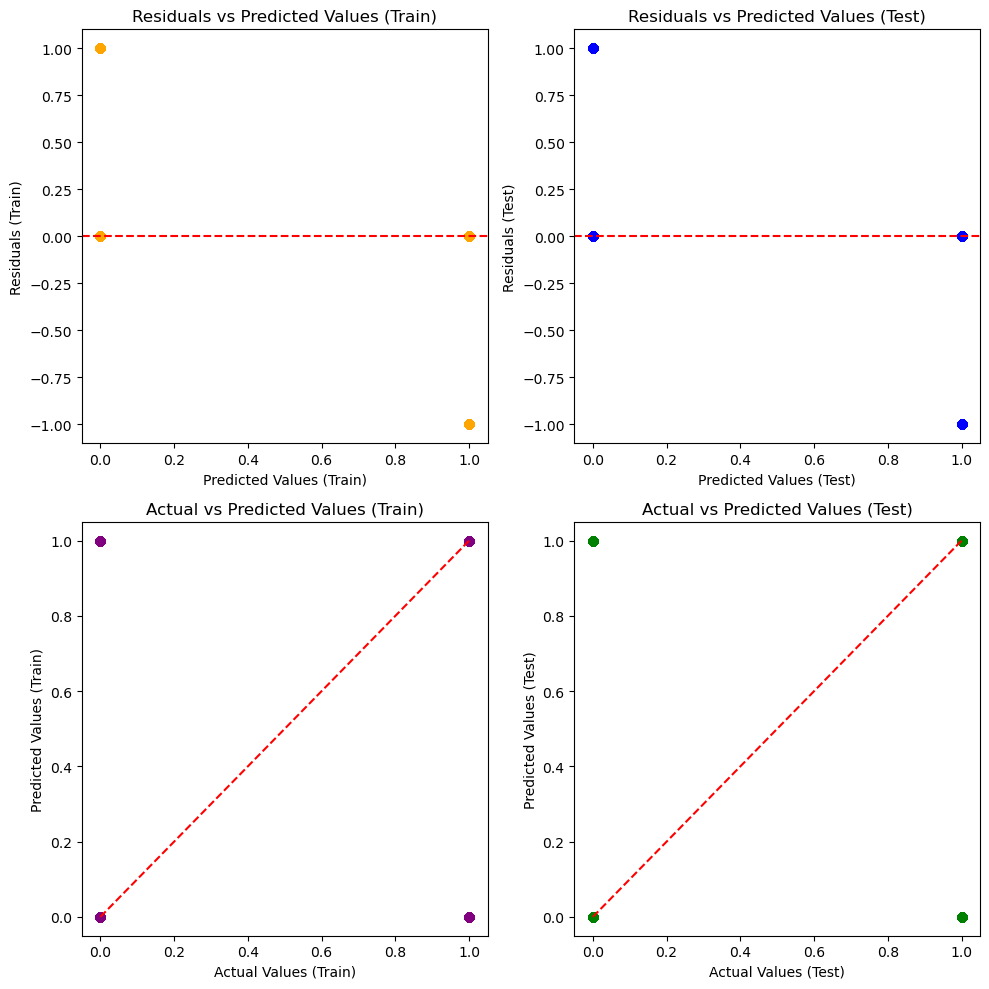

{'Model': 'KNN',
 'Training Time (s)': 86.89817595481873,
 'Accuracy Train': 0.9565832940066069,
 'Accuracy Test': 0.9512507106310404,
 'F1-Score Train': 0.9571636275371521,
 'F1-Score Test': 0.9721651157758061,
 'Precision Train': 0.944457029741773,
 'Precision Test': 0.9903188176833133,
 'Recall Train': 0.9702176729059185,
 'Recall Test': 0.954664990215784,
 'ROC AUC Train': 0.9565826533228948,
 'ROC AUC Test': 0.9388962030795935}

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_result = evaluate_model(KNeighborsClassifier(), 'KNN')
results.append(knn_result)
knn_result

### Gradient Boosting

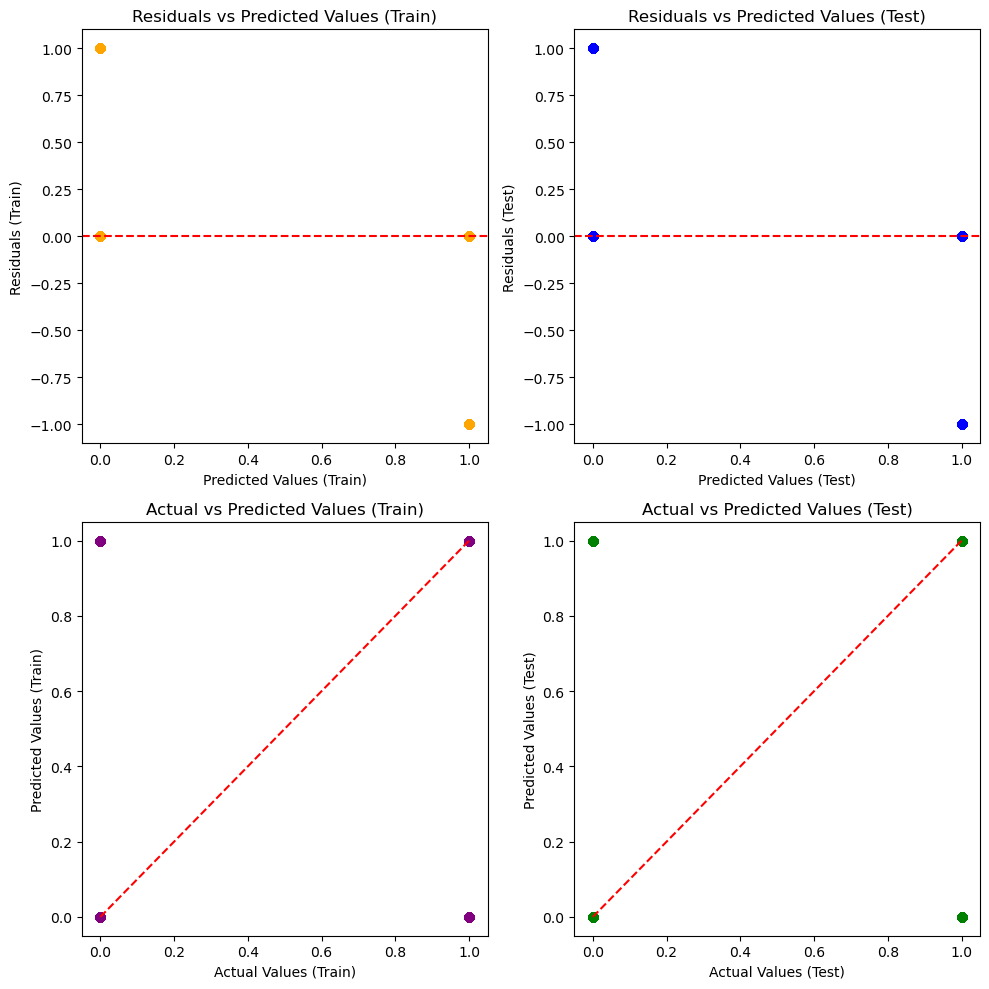

{'Model': 'Gradient Boosting',
 'Training Time (s)': 127.01380801200867,
 'Accuracy Train': 0.9640711027214094,
 'Accuracy Test': 0.9135398900890658,
 'F1-Score Train': 0.9647930898409435,
 'F1-Score Test': 0.949369312717319,
 'Precision Train': 0.9457581015428751,
 'Precision Test': 0.9934775245560555,
 'Recall Train': 0.9846113581378549,
 'Recall Test': 0.9090112186440228,
 'ROC AUC Train': 0.9640673726756752,
 'ROC AUC Test': 0.9299268039832322}

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb_results = evaluate_model(GradientBoostingClassifier(random_state=42), 'Gradient Boosting')
results.append(gb_results)
gb_results

### Baseline Model Evaluation Result

In [71]:
results_df = pd.DataFrame(results)

results_df['Accuracy Difference'] = results_df['Accuracy Test'] - results_df['Accuracy Train']
results_df['F1-Score Difference'] = results_df['F1-Score Test'] - results_df['F1-Score Train']
results_df['Precision Difference'] = results_df['Precision Test'] - results_df['Precision Train']
results_df['Recall Difference'] = results_df['Recall Test'] - results_df['Recall Train']
results_df['ROC AUC Difference'] =  results_df['ROC AUC Test'] - results_df['ROC AUC Train']


columns_order = [
    'Model', 'Training Time (s)',
    'Accuracy Train', 'Accuracy Test', 'Accuracy Difference',
    'F1-Score Train', 'F1-Score Test', 'F1-Score Difference',
    'Precision Train','Precision Test','Precision Difference',
    'Recall Train', 'Recall Test', 'Recall Difference',
    'ROC AUC Train', 'ROC AUC Test', 'ROC AUC Difference'
]


results_df = results_df[columns_order].sort_values(
    by=['Accuracy Difference'],
    ascending=[True]
)

pd.options.display.float_format = '{:.4f}'.format

results_df

,Model,Training Time (s),Accuracy Train,Accuracy Test,Accuracy Difference,F1-Score Train,F1-Score Test,F1-Score Difference,Precision Train,Precision Test,Precision Difference,Recall Train,Recall Test,Recall Difference,ROC AUC Train,ROC AUC Test,ROC AUC Difference
1,Random Forest,83.5911,0.9997,0.5478,-0.4519,0.9997,0.6616,-0.3382,0.9995,0.9946,-0.0049,0.9999,0.4956,-0.5043,0.9997,0.7368,-0.2629
2,Decision Tree,7.7709,0.9997,0.9349,-0.0649,0.9997,0.9624,-0.0374,0.9999,0.9925,-0.0074,0.9996,0.9340,-0.0656,0.9997,0.9378,-0.0619
4,Gradient Boosting,127.0138,0.9641,0.9135,-0.0505,0.9648,0.9494,-0.0154,0.9458,0.9935,0.0477,0.9846,0.9090,-0.0756,0.9641,0.9299,-0.0341
3,KNN,79.7829,0.9566,0.9513,-0.0053,0.9572,0.9722,0.0150,0.9445,0.9903,0.0459,0.9702,0.9547,-0.0156,0.9566,0.9389,-0.0177
0,Logistic Regression,4.8290,0.9057,0.9149,0.0091,0.9073,0.9505,0.0433,0.8926,0.9859,0.0933,0.9225,0.9176,-0.0048,0.9057,0.9048,-0.0009


### Insight Summary

- Baseline model training experiment used 5 different models.
- KNN was the best base line model

## Tuning Model

## Define Function for Model Evaluation

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    accuracy_train_list = []
    f1_train_list = []
    precision_train_list = []
    recall_train_list = []
    roc_auc_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        accuracy_train_list.append(accuracy_score(y_train_fold, y_train_pred))
        f1_train_list.append(f1_score(y_train_fold, y_train_pred))
        precision_train_list.append(precision_score(y_train_fold, y_train_pred))
        recall_train_list.append(recall_score(y_train_fold, y_train_pred))
        roc_auc_train_list.append(roc_auc_score(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    accuracy_train = np.mean(accuracy_train_list)
    f1_train = np.mean(f1_train_list)
    precision_train = np.mean(precision_train_list)
    recall_train = np.mean(recall_train_list)
    roc_auc_train = np.mean(roc_auc_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    
    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    plt.figure(figsize=(10, 10))

    # Residuals vs Predicted Values (Train)
    plt.subplot(2, 2, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')

    # Residuals vs Predicted Values (Test)
    plt.subplot(2, 2, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')

    # Actual vs Predicted Values (Train)
    plt.subplot(2, 2, 3)
    plt.scatter(y_train, y_train_pred, color='purple', alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Train)')
    plt.xlabel('Actual Values (Train)')
    plt.ylabel('Predicted Values (Train)')

    # Actual vs Predicted Values (Test)
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values (Test)')
    plt.ylabel('Predicted Values (Test)')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'Accuracy Train': accuracy_train,
        'Accuracy Test': accuracy_test,
        'F1-Score Train': f1_train,
        'F1-Score Test': f1_test,
        'Precision Train': precision_train,
        'Precision Test': precision_test,
        'Recall Train': recall_train,
        'Recall Test': recall_test,
        'ROC AUC Train': roc_auc_train,
        'ROC AUC Test': roc_auc_test
    }

results_tuning = []

### KNN 

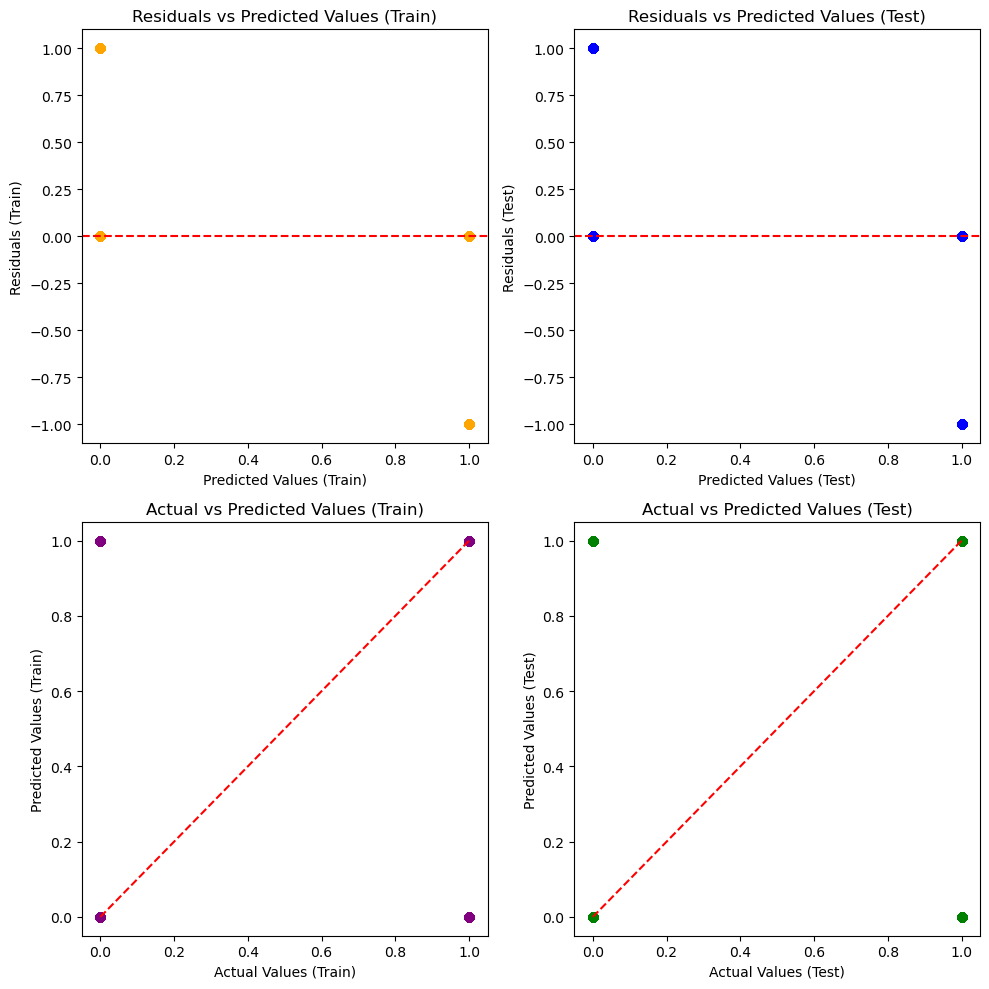

In [104]:
knn_param = {'n_neighbors':np.arange(1,30,2)}
model = KNeighborsClassifier()
knn_tuning= GridSearchCV(model, knn_param, scoring='accuracy', cv=3)
knn_tuning.fit(X_train, y_train)
results_tuning.append(evaluate_model(knn_tuning.best_estimator_,'K-Neighbors Grid Search'))

### Gradient Boosting

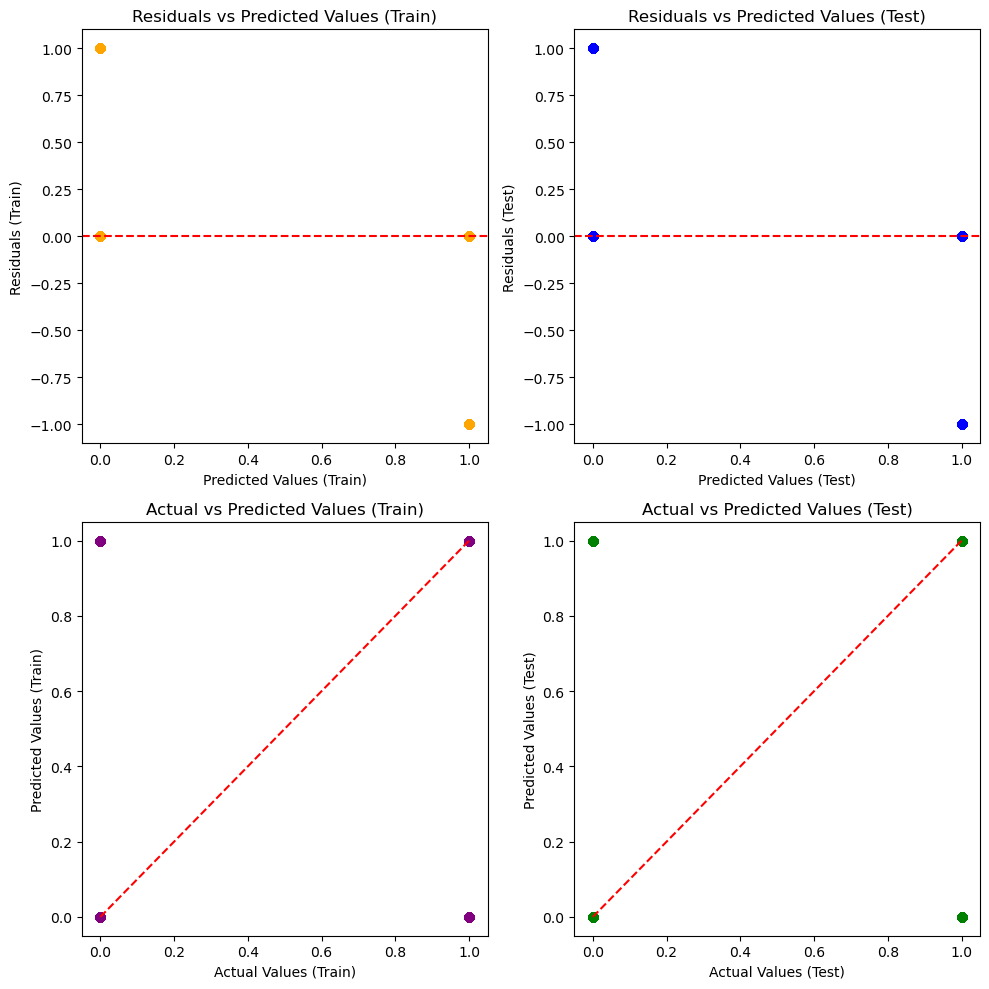

In [105]:
gb_params = {'n_estimators': [100], 
    'learning_rate': [0.2],
    'max_depth': [5],
    'subsample':[0.8]}
model = GradientBoostingClassifier()
gb_tuning= GridSearchCV(model, gb_params, scoring='accuracy', cv=3)
gb_tuning.fit(X_train, y_train)
results_tuning.append(evaluate_model(gb_tuning.best_estimator_,'Gradient Boosting Grid Search'))

### XG Boost

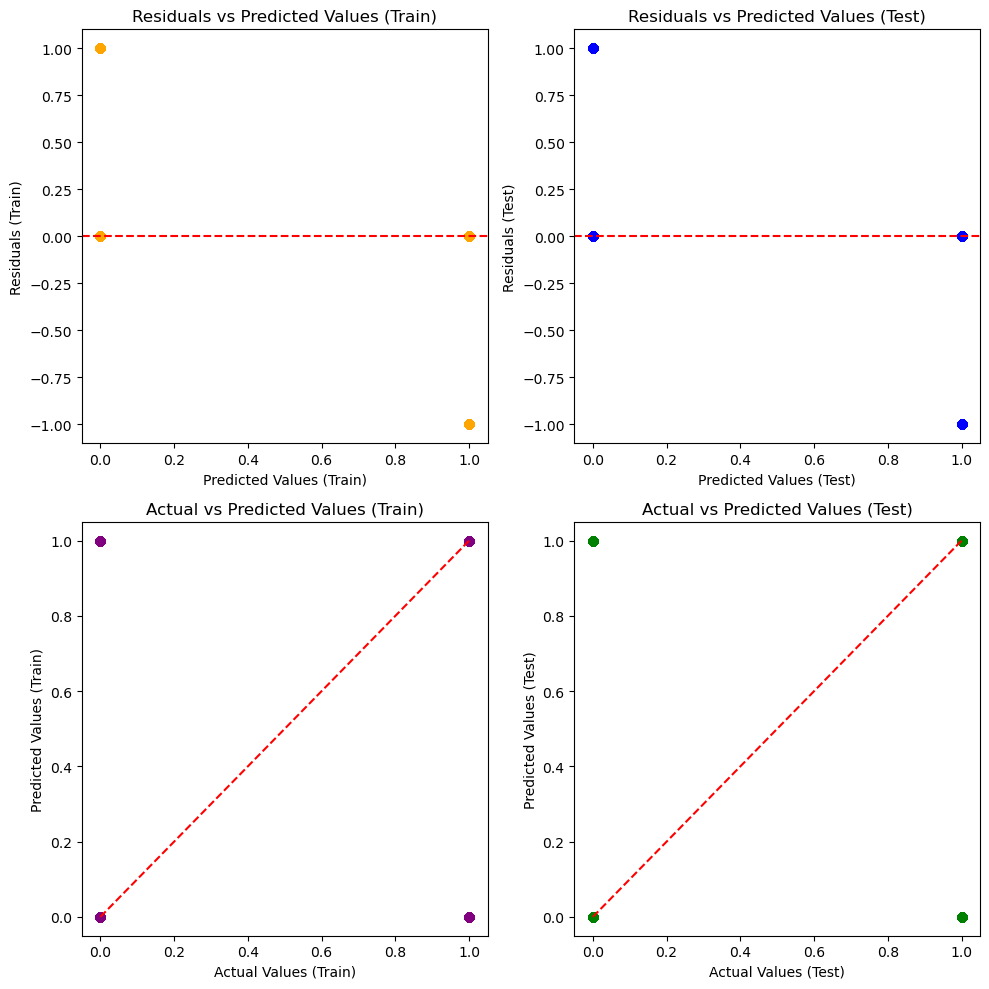

In [106]:
from xgboost import XGBClassifier
xg_params = {'n_estimators': [100],        
    'max_depth': [5],               
    'learning_rate': [0.2], 
    'subsample': [0.8]}
model = XGBClassifier()
xg_tuning = GridSearchCV(model, xg_params, scoring='accuracy', cv=3)
xg_tuning.fit(X_train, y_train)
results_tuning.append(evaluate_model(xg_tuning.best_estimator_,'XG Boost Grid Search'))

### CatBoost

0:	learn: 0.5638398	total: 7.68ms	remaining: 760ms
1:	learn: 0.4759678	total: 14.8ms	remaining: 727ms
2:	learn: 0.4141325	total: 20.9ms	remaining: 677ms
3:	learn: 0.3700108	total: 26.3ms	remaining: 631ms
4:	learn: 0.3356019	total: 32.1ms	remaining: 610ms
5:	learn: 0.3068106	total: 38.9ms	remaining: 609ms
6:	learn: 0.2821031	total: 45.3ms	remaining: 602ms
7:	learn: 0.2630895	total: 51.7ms	remaining: 594ms
8:	learn: 0.2444866	total: 58ms	remaining: 586ms
9:	learn: 0.2327735	total: 64.3ms	remaining: 579ms
10:	learn: 0.2203643	total: 72ms	remaining: 583ms
11:	learn: 0.2098462	total: 78.4ms	remaining: 575ms
12:	learn: 0.2014058	total: 84.2ms	remaining: 564ms
13:	learn: 0.1942977	total: 90.2ms	remaining: 554ms
14:	learn: 0.1876236	total: 96.6ms	remaining: 547ms
15:	learn: 0.1813816	total: 103ms	remaining: 539ms
16:	learn: 0.1765674	total: 109ms	remaining: 534ms
17:	learn: 0.1720201	total: 115ms	remaining: 524ms
18:	learn: 0.1666123	total: 121ms	remaining: 517ms
19:	learn: 0.1632200	total: 12

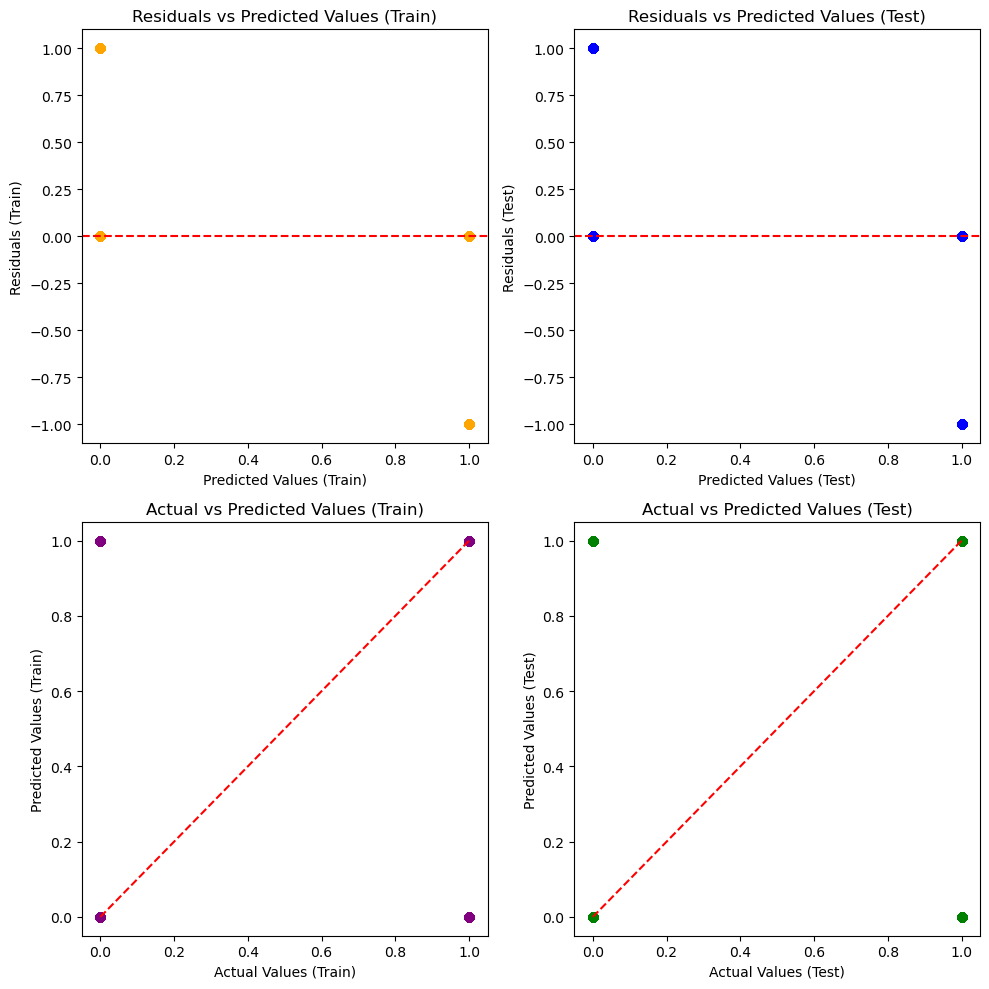

In [107]:
from catboost import CatBoostClassifier

cb_params = {'learning_rate':[0.2],
             'max_depth':[5],
             'iterations':[100],
             'subsample':[0.8]
}
model = CatBoostClassifier()
cb_tuning = GridSearchCV(model, cb_params, scoring='accuracy', cv=3)
cb_tuning.fit(X_train, y_train)
results_tuning.append(evaluate_model(cb_tuning.best_estimator_,'CatBoost Grid Search'))

### LightGBM

[LightGBM] [Info] Number of positive: 21190, number of negative: 21190
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3055
[LightGBM] [Info] Number of data points in the train set: 42380, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

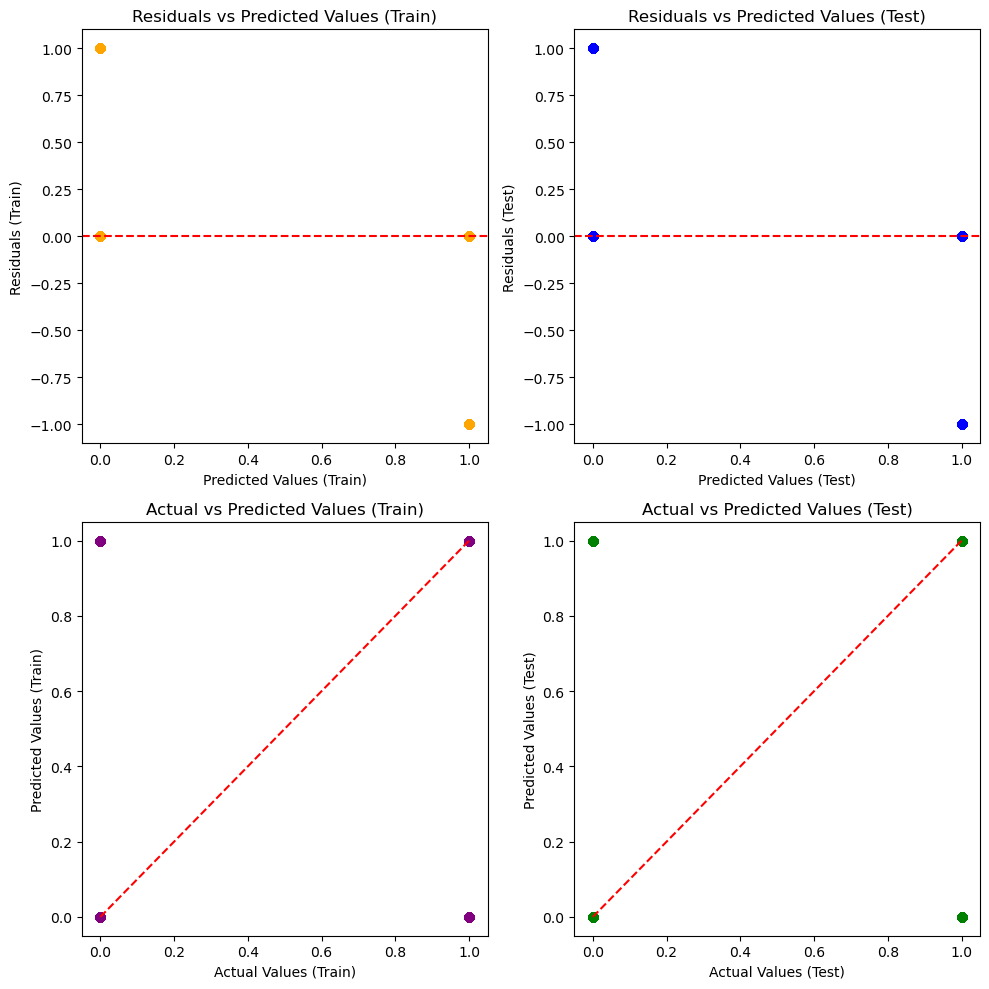

In [108]:
from lightgbm import LGBMClassifier

lgbm_params = {'n_estimators': [100],        
    'max_depth': [5],               
    'learning_rate': [0.2], 
    'subsample': [0.8]}
model = LGBMClassifier()
lgbm_tuning = GridSearchCV(model, lgbm_params, scoring='accuracy', cv=3)
lgbm_tuning.fit(X_train, y_train)
results_tuning.append(evaluate_model(lgbm_tuning.best_estimator_,'LightGBM Grid Search'))

### Tuning Model Evaluation Result

In [109]:
results_df = pd.DataFrame(results_tuning)

results_df['Accuracy Difference'] = results_df['Accuracy Test'] - results_df['Accuracy Train']
results_df['F1-Score Difference'] = results_df['F1-Score Test'] - results_df['F1-Score Train']
results_df['Precision Difference'] = results_df['Precision Test'] - results_df['Precision Train']
results_df['Recall Difference'] = results_df['Recall Test'] - results_df['Recall Train']
results_df['ROC AUC Difference'] =  results_df['ROC AUC Test'] - results_df['ROC AUC Train']


results_df = results_df[columns_order].sort_values(by=['Accuracy Test','Accuracy Train','Accuracy Difference'],ascending=[True,True,True])

results_df

,Model,Training Time (s),Accuracy Train,Accuracy Test,Accuracy Difference,F1-Score Train,F1-Score Test,F1-Score Difference,Precision Train,Precision Test,Precision Difference,Recall Train,Recall Test,Recall Difference,ROC AUC Train,ROC AUC Test,ROC AUC Difference
4,LightGBM Grid Search,6.3492,0.9757,0.7047,-0.2710,0.9761,0.8028,-0.1733,0.9594,0.9925,0.0331,0.9933,0.6739,-0.3194,0.9757,0.8161,-0.1596
2,XG Boost Grid Search,6.3167,0.9749,0.8736,-0.1013,0.9753,0.9240,-0.0513,0.9583,0.9958,0.0375,0.9929,0.8618,-0.1311,0.9749,0.9160,-0.0589
1,Gradient Boosting Grid Search,99.7302,0.9782,0.9014,-0.0767,0.9785,0.9418,-0.0367,0.9633,0.9942,0.0309,0.9942,0.8947,-0.0995,0.9782,0.9257,-0.0525
0,K-Neighbors Grid Search,71.2510,0.9566,0.9513,-0.0053,0.9572,0.9722,0.0150,0.9445,0.9903,0.0459,0.9702,0.9547,-0.0156,0.9566,0.9389,-0.0177
3,CatBoost Grid Search,9.5911,0.9669,0.9540,-0.0128,0.9675,0.9737,0.0062,0.9482,0.9933,0.0451,0.9877,0.9549,-0.0328,0.9669,0.9508,-0.0160


### Insight Summary

- Hyperparameter Tuning was conducted in 5 different models.
- KNN after Tuning gave same performance as before Tuning with shorter training period
- CatBoost showed best performance after Tuning

## Baseline vs Tuning Comparison

<Figure size 800x600 with 0 Axes>

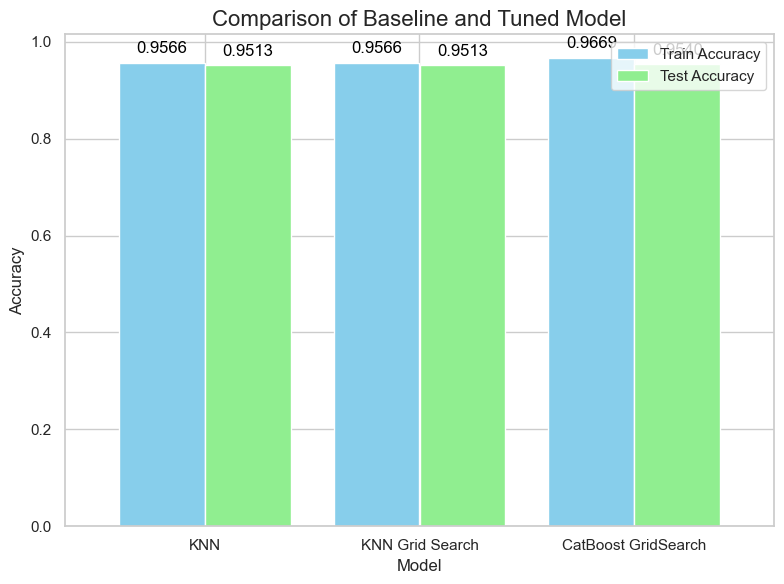

In [115]:
# Accuracy Score Before and After Tuning
best_results = {
    'Model': ['KNN', 'KNN Grid Search','CatBoost GridSearch'],
    'Train Accuracy': [0.9566, 0.9566, 0.9669],
    'Test Accuracy': [0.9513, 0.9513, 0.9540]
}

df = pd.DataFrame(best_results)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
df.set_index('Model').plot(kind='bar', figsize=(8, 6), width=0.8, color=['skyblue', 'lightgreen'])
plt.title('Comparison of Baseline and Tuned Model', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Summary

KNN GridSearch Model was chosen because of:
- Shown best performance compared the other model
- Less overfit than CatBoost
- Shorter training time compared to KNN Baseline model

## Save Model

In [116]:
import joblib

scaler.fit(X_train)
joblib.dump(knn_tuning, 'knn_model.joblib')
joblib.dump(scaler, 'standardscaler.joblib')

['standardscaler.joblib']

## Test Model

In [121]:
### Load GridSearchCV model
grid_search = joblib.load('knn_model.joblib')
model = grid_search.best_estimator_
scaler = joblib.load('standardscaler.joblib')

# New Data
X_new = pd.DataFrame({
    'recoveries': [0],
    'collection_recovery_fee': [0],
    'total_rec_prncp': [0],
    'last_pymnt_year': [2014],
    'last_pymnt_amnt': [180.5],
    'last_pymnt_month': [6],
    'total_pymnt': [1000],
    'total_pymnt_inv': [50],
    'out_prncp': [90],
    'out_prncp_inv': [100],
    'int_rate': [13],
    'total_rec_int': [12],
    'installment':[6],
    'last_credit_pull_year': [2015],
    'grade': [3],
    'total_rec_late_fee': [9]
})

# Prediction
if set(X_new.columns) == set(model.feature_names_in_):
    # Scale the new DataFrame
    X_new_scaled = scaler.transform(X_new)
    
    # Predict
    y_pred = model.predict(X_new_scaled)
    print("Acceptance:", y_pred)
else:
    print("Feature names don't fit")


Acceptance: [1]


C:\Users\putri\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
